
# Import and Look Around



In [2]:
#Language cleaning
!pip install langdetect

#For pretty geoplots
!pip install geojsoncontour
!pip install geopandas


!pip install wordcloud
!pip install plotly
!pip install cufflinks

In [3]:
#Basic imports
import numpy as np
import seaborn as sb
import pandas as pd
import time
import datetime

#Language cleaning imports
from langdetect import detect

import nltk
from nltk.corpus import wordnet

import string
from nltk import pos_tag
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer



#Vader imports
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')



#Wordcloud imports
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

from wordcloud import WordCloud, ImageColorGenerator



#For Scatterplot
import matplotlib                  
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline



#For pretty, interactive plots
from numpy import linspace
from scipy.interpolate import griddata

import plotly.express as px
from shapely.geometry import Polygon, MultiPolygon
import geopandas as gpd
import matplotlib.pyplot as plt
import geojsoncontour

#Cufflinks wrapper on plotly
import cufflinks
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

from plotly.offline import iplot
from plotly.offline import plot
cufflinks.go_offline()

#Set global theme
import plotly.figure_factory as ff
import plotly.graph_objects as go
import plotly.io as pio

#Calculate Distance
from math import sin, cos, sqrt, atan2, radians

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/marcusang/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/marcusang/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/marcusang/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/marcusang/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


**Some questions or ideas that I've thought of:**


**Harder ones:**
1. Geomapping all the samples and heatmapping it to the CBD and seeing how the distance to certain attractions/town will affect the price of the rental.
2. Using the reviews of each ID, we can look at if lower rated AirBnBs receive higher ratings as time goes on, based on the owner's self-improvements to their properties. 
3. Sentiment Analysis of the reviews to determine how good the property is. Like can check for something along the lines of stronger keywords - 'I like this very much' and see if that correlates to a stronger rating (out of 10). So, we might see that in general, if people are more expressive in their reviews, and see if that affects the rating scores. Not sure if we can get much results out of this. I think the other options are better. 



**Simpler ones:**
1. Looking at how seasons and festivals and indirectly months, affect the amount of bookings and the price of bookings. 
2. Look at if some owners own multiple properties and if so, how the prices/reviews etc vary between the 2 houses. 



**Machine Learning Aspect**
1. We can probably look into Sckit Learn and build a model for how these set of variables affect the pricing of the houses, and not only that, but how we expect the price to progress throughout the year. 
2. We can look into price optimisation problems as well. Can we, based on a set of factors, optimise the price of listings? We can include a bunch of variables we think might affect price and work on that to judge if house prices are undervalued or overvalued.



**Merging Plans**
1. I think most of the data is quite complete. I suggest merging by House ID or Owner's ID, depending on what we are looking at doing



In [4]:
#Importing of the dataset

listingSum = pd.read_csv('listings_summary.csv')
calSum = pd.read_csv('calendar_summary.csv')
listing = pd.read_csv('listings.csv')
nbHoods = pd.read_csv('neighbourhoods.csv')
reviews = pd.read_csv('reviews.csv')
revSum = pd.read_csv('reviews_summary.csv')

A bit of background about the CSV files (by opening in Excel)



**Listing Summary**
- 18,000 lines
- Columns did not import properly, I think need to manually edit. 
-  Ok, a lot of columns (96)
  - URL, name, summary, neighbouthood overview, size, public transport options, facilities, if the owner is staying in the house while the guest is around, about the host, if host is superHost(interesting). Has all the small details of every house. Quite alot to clean
  



**Listing**
- 22,000 lines
- Lots of columns but not much detail. Can probably remove columns taht we think won't affect the data, like host name and ID and the house name etc. 




**Calendar Summary**
- 8 Million lines
- Has a range of dates and the prices for each of the date
- A quick look through showed that New Year Period was more expensive
- Columns (Listing ID, Date, Available, Price)
- Not 100% sure what the values under available are (Has values f and t)

**Neighbourhoods**
- Contains neighbourhood clusters and which neighbourhoods are within in
-  A bit like West of Singapore contains BoonLay, Pioneer, Jurong etc. That sort of grouping. Can compare neighbourhoods. 

**Reviews**
- 402000 lines of dates of reviews.
- I think must merge with Reviews Summary to see which date and reviews corroborate
- Not impt dataset. Can use for the questions that we go into more detail for. Like looking at one owner's multiple properties etc. Not useful for main analysis. 
- Wait Reviews Summary has dates as well. So Reviews is probably useless. 

**Review Summary**
- 402,000 lines of reviews
- Includes reviewer ID, can see if there are duplicates of these. Maybe reviewer has reviewed a few properties. Can use them as basis to compare properties and relative scores. 
- A lot of reviews are in German. Need to translate.
- A lot of English reviews as well. So should be ok? I think translation might skew sentiment analysis because then translation bias becomes a factor.
- If in German, we can do something like domestic vs international reviewers. 





In [5]:
revSum.head()

listing_id        id        date  reviewer_id reviewer_name  \
0        2015  69544350  2016-04-11      7178145         Rahel   
1        2015  69990732  2016-04-15     41944715        Hannah   
2        2015  71605267  2016-04-26     30048708        Victor   
3        2015  73819566  2016-05-10     63697857          Judy   
4        2015  74293504  2016-05-14     10414887        Romina   

                                            comments  
0  Mein Freund und ich hatten gute gemütliche vie...  
1  Jan was very friendly and welcoming host! The ...  
2  Un appartement tres bien situé dans un quartie...  
3  It is really nice area, food, park, transport ...  
4  Buena ubicación, el departamento no está orden...

In [6]:
revSum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401963 entries, 0 to 401962
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     401963 non-null  int64 
 1   id             401963 non-null  int64 
 2   date           401963 non-null  object
 3   reviewer_id    401963 non-null  int64 
 4   reviewer_name  401963 non-null  object
 5   comments       401467 non-null  object
dtypes: int64(3), object(3)
memory usage: 18.4+ MB


In [7]:
listingSum.head()

id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 sq meters. This wood...   
1                                                NaN   
2  This beautiful first floor apartment  is situa...   
3  First of all: I prefer short-notice bookings. ...   
4  Cozy and large room in the beautiful district ...   

                                               space  \
0  A+++ location! This „Einliegerwohnung“ is an e...   
1  In the summertime we are spending most of our ...   
2  1st floor (68m2) apartment on Kollwitzplatz/ P...   
3  Your room is really big and has 26 sqm, is ver...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description experiences_offered  \
0  Great location!  30 of 75 sq meters. This wood...                none   
1  In the summertime we are spending most of our ...                none   
2  This beautiful first floor apartment  is situa...                none   
3  First of all: I prefer short-notice bookings. ...                none   
4  Cozy and large room in the beautiful district ...                none   

                               neighborhood_overview  ... requires_license  \
0  It is located in the former East Berlin area o...  ...                t   
1                                                NaN  ...                t   
2  The neighbourhood is famous for its variety of...  ...                t   
3  My flat is in the middle of West-Berlin, direc...  ...                t   
4  Great neighborhood with plenty of Cafés, Baker...  ...                t   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN                NaN                f                        f   
1     NaN                NaN                f                        f   
2     NaN                NaN                t                        f   
3     NaN                NaN                f                        f   
4     NaN                NaN                f                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     flexible                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4                     moderate                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               4   
1                                f                               1   
2                                f                               1   
3                                f                               1   
4                                f                               1   

   reviews_per_month  
0               3.76  
1               1.42  
2               1.25  
3               0.39  
4               1.75  

[5 rows x 96 columns]

In [8]:
listingSum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

In [9]:
print("Number of listings: ", listing.shape[0])

Number of listings:  22552


In [10]:
revSum.head()

listing_id        id        date  reviewer_id reviewer_name  \
0        2015  69544350  2016-04-11      7178145         Rahel   
1        2015  69990732  2016-04-15     41944715        Hannah   
2        2015  71605267  2016-04-26     30048708        Victor   
3        2015  73819566  2016-05-10     63697857          Judy   
4        2015  74293504  2016-05-14     10414887        Romina   

                                            comments  
0  Mein Freund und ich hatten gute gemütliche vie...  
1  Jan was very friendly and welcoming host! The ...  
2  Un appartement tres bien situé dans un quartie...  
3  It is really nice area, food, park, transport ...  
4  Buena ubicación, el departamento no está orden...

In [11]:
revSum.shape

(401963, 6)

# Drop irrelevant data and combining relevant tables

In [12]:
listingdata = pd.concat([listingSum, listing], axis = 1).reindex(listing.index)

In [13]:
listingdata = listingdata.loc[:,~listingdata.columns.duplicated()]

In [14]:
listingdata=listingdata.drop(['space', 'transit', 'name', 'host_name', 'listing_url', 'access','host_verifications', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 
                        'host_is_superhost', 'scrape_id','last_scraped','summary','experiences_offered','thumbnail_url','medium_url','xl_picture_url',
                       'host_acceptance_rate','host_picture_url','host_total_listings_count','market','city','state','smart_location',
                       'country_code','country','is_location_exact','weekly_price','monthly_price','calendar_last_scraped','first_review',
                        'license','jurisdiction_names','is_business_travel_ready','require_guest_profile_picture',
                      'require_guest_phone_verification','host_thumbnail_url','guests_included',
                      'extra_people','calendar_updated','requires_license','instant_bookable','cleaning_fee',
                      'security_deposit','amenities','bed_type','street','host_listings_count','host_identity_verified',
                      'host_has_profile_pic','host_url','host_location','host_response_time','host_response_rate',
                      'picture_url','interaction','house_rules','notes','description','neighborhood_overview','host_about',
                      'maximum_nights','zipcode','has_availability'],axis=1)
print("Number of rows of data:\t\t", listingdata.shape[0])
print("Number of columns of data:\t", listingdata.shape[1])

Number of rows of data:		 22552
Number of columns of data:	 33


In [15]:
listingdata.head()

id  host_id  host_since host_neighbourhood    neighbourhood   latitude  \
0  2015     2217  2008-08-18              Mitte            Mitte  52.534537   
1  2695     2986  2008-09-16    Prenzlauer Berg              NaN  52.548513   
2  3176     3718  2008-10-19    Prenzlauer Berg  Prenzlauer Berg  52.534996   
3  3309     4108  2008-11-07         Schöneberg       Schöneberg  52.498855   
4  7071    17391  2009-05-16    Prenzlauer Berg  Prenzlauer Berg  52.543157   

   longitude property_type        room_type  accommodates  ...  \
0  13.402557    Guesthouse  Entire home/apt             3  ...   
1  13.404553     Apartment     Private room             2  ...   
2  13.417579     Apartment  Entire home/apt             4  ...   
3  13.349065     Apartment     Private room             2  ...   
4  13.415091     Apartment     Private room             2  ...   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0                    10.0                        9.0                   10.0   
1                    10.0                       10.0                   10.0   
2                     9.0                        9.0                    9.0   
3                     9.0                        9.0                    9.0   
4                    10.0                       10.0                   10.0   

   review_scores_communication review_scores_location  review_scores_value  \
0                         10.0                   10.0                  9.0   
1                         10.0                   10.0                 10.0   
2                          9.0                   10.0                  9.0   
3                         10.0                    9.0                  9.0   
4                         10.0                   10.0                  9.0   

           cancellation_policy  calculated_host_listings_count  \
0  strict_14_with_grace_period                               4   
1                     flexible                               1   
2  strict_14_with_grace_period                               1   
3  strict_14_with_grace_period                               1   
4                     moderate                               1   

   reviews_per_month     neighbourhood_group  
0               3.76                   Mitte  
1               1.42                  Pankow  
2               1.25                  Pankow  
3               0.39  Tempelhof - Schöneberg  
4               1.75                  Pankow  

[5 rows x 33 columns]

In [16]:
listingdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22552 non-null  int64  
 1   host_id                         22552 non-null  int64  
 2   host_since                      22526 non-null  object 
 3   host_neighbourhood              17458 non-null  object 
 4   neighbourhood                   21421 non-null  object 
 5   latitude                        22552 non-null  float64
 6   longitude                       22552 non-null  float64
 7   property_type                   22552 non-null  object 
 8   room_type                       22552 non-null  object 
 9   accommodates                    22552 non-null  int64  
 10  bathrooms                       22520 non-null  float64
 11  bedrooms                        22534 non-null  float64
 12  beds                            

# Response Variable

## Change 'price' to numeric

In [17]:
listingdata[['price']].head()

price
0  $60.00
1  $17.00
2  $90.00
3  $26.00
4  $42.00

In [18]:
listingdata['price'] = listingdata['price'].str.replace('$', '')
listingdata['price'] = listingdata['price'].str.replace(',', '')
listingdata=listingdata.astype({'price':'float64'})

In [19]:
listingdata[['price']].head()

price
0   60.0
1   17.0
2   90.0
3   26.0
4   42.0

## UniVariate Analysis

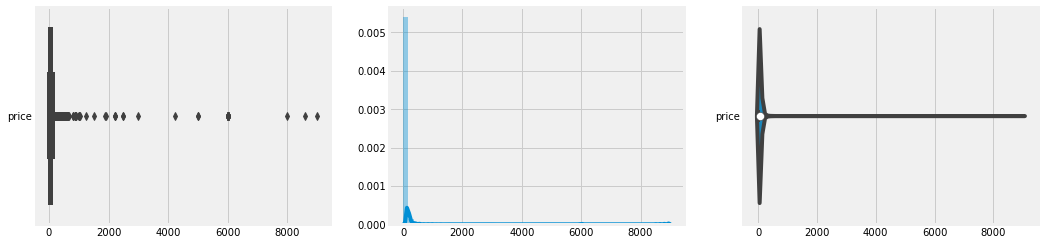

In [20]:
f, axes = plt.subplots(1, 3, figsize = (16, 4))

sb.boxplot(data = pd.DataFrame(listingdata['price']), orient = "h", ax = axes[0])
sb.distplot(pd.DataFrame(listingdata['price']), ax = axes[1])
sb.violinplot(data = pd.DataFrame(listingdata['price']), orient = "h", ax = axes[2])

Price is equal to '0' for some of the listing data, which doesn't make any sense, hence we will simply drop them. 

Few listings with extremely costly price per night. Hence, we set a threshold value where price equals to 1000 max, and drop the data with price > 1000


## Remove illogic data and outliers

In [21]:
print("Number of datas with 'price' equals to 0: ", listingdata[listingdata['price'] == 0].shape[0])
print("Number of datas with missing 'price': ", listingdata[listingdata['price'].isna()].shape[0])
listingdata = listingdata[listingdata['price'] > 0]
listingdata = listingdata[listingdata['price'] <= 200]
listingdata = listingdata[listingdata['price'].isna() == False]
print('Number of rows of data after removing outliers and dropping illogical data: ', listingdata.shape[0])

Number of datas with 'price' equals to 0:  8
Number of datas with missing 'price':  0
Number of rows of data after removing outliers and dropping illogical data:  22132


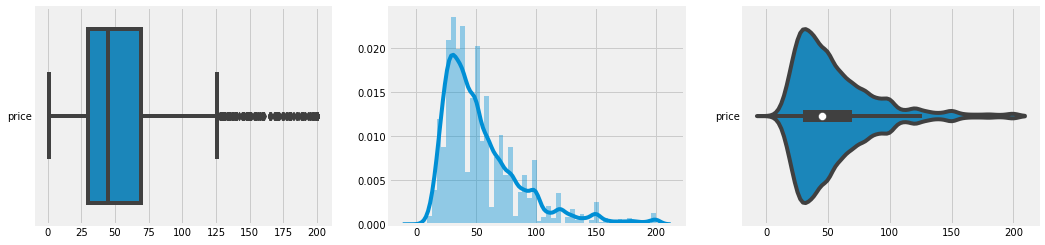

In [22]:
f, axes = plt.subplots(1, 3, figsize = (16, 4))

sb.boxplot(data = pd.DataFrame(listingdata['price']), orient = "h", ax = axes[0])
sb.distplot(pd.DataFrame(listingdata['price']), ax = axes[1])
sb.violinplot(data = pd.DataFrame(listingdata['price']), orient = "h", ax = axes[2])

In [23]:
price = pd.DataFrame(listingdata['price'])

In [24]:
listingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22132 non-null  int64  
 1   host_id                         22132 non-null  int64  
 2   host_since                      22107 non-null  object 
 3   host_neighbourhood              17123 non-null  object 
 4   neighbourhood                   21018 non-null  object 
 5   latitude                        22132 non-null  float64
 6   longitude                       22132 non-null  float64
 7   property_type                   22132 non-null  object 
 8   room_type                       22132 non-null  object 
 9   accommodates                    22132 non-null  int64  
 10  bathrooms                       22100 non-null  float64
 11  bedrooms                        22114 non-null  float64
 12  beds                            

## Adding extra features(Sentimental Analysis and Estimated distance from Central)

#### Sentimental Analysis 

# Language Cleaning

In [25]:
def detect_lang(sente):
    sente=str(sente)
    try:
        return detect(sente)
    except:
        return "None"

for index,row in revSum.iterrows():
    lang = detect_lang(row['comments'])
    revSum.at[index,'language'] = lang
    
#taking rows whose language is English
EngrevSum = revSum[revSum.language=='en']

In [26]:
#The process above takes 30-45 minutes, so let's save this, just in case. 
EngrevSum.to_csv('EngRev.csv', index=False)

In [27]:
EngrevSum.head()

listing_id        id        date  reviewer_id reviewer_name  \
1        2015  69990732  2016-04-15     41944715        Hannah   
3        2015  73819566  2016-05-10     63697857          Judy   
6        2015  76603178  2016-05-28     29323516       Laurent   
7        2015  77296201  2016-05-31      9025122        Rasmus   
9        2015  82322683  2016-06-27     73902920           Mag   

                                            comments language  
1  Jan was very friendly and welcoming host! The ...       en  
3  It is really nice area, food, park, transport ...       en  
6  We had a very nice stay in Berlin, thanks to J...       en  
7  Great location close to Mauerpark, Kastanienal...       en  
9  Apartment very well located, close to everythi...       en

In [28]:
EngrevSum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271817 entries, 1 to 401962
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   listing_id     271817 non-null  int64 
 1   id             271817 non-null  int64 
 2   date           271817 non-null  object
 3   reviewer_id    271817 non-null  int64 
 4   reviewer_name  271817 non-null  object
 5   comments       271817 non-null  object
 6   language       271817 non-null  object
dtypes: int64(3), object(4)
memory usage: 16.6+ MB


In [29]:
#Defining the POS Tagging function
#Tags words based on what types of words they are (Adjective, Verb, Noun, Adverbs)
#If no match, just return as NOUN
def wordnetPOS(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [30]:
#Define the cleaning function
#Tokenize: Makes text into individual words
#STOP Words: Irrelevant words with no meaning (Eg. Might, as, various etc.)
#Empty tokens: Empty strings basically
#POS Tag: Tag words based on what type of words they are
#Lemmatize: Reduce words to base form
#Join: Put everything back together

def cleanText(text):
    #Make everything into lowercase
    text = text.lower()
    #Tokenize text, remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #If words contain numbers, remove them
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #Remove Stop Words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #Remove empty tokens
    text = [t for t in text if len(t) > 0]
    #POS tag text
    pos_tags = pos_tag(text)
    #Lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], wordnetPOS(t[1])) for t in pos_tags]
    #Remove single letter words
    text = [t for t in text if len(t) > 1]
    #Join all
    text = " ".join(text)
    return(text)

In [31]:
#
EngrevSum["comments_clean"] = EngrevSum["comments"].apply(lambda x: cleanText(x))

In [32]:
#To visualise the data again
EngrevSum.head()

listing_id        id        date  reviewer_id reviewer_name  \
1        2015  69990732  2016-04-15     41944715        Hannah   
3        2015  73819566  2016-05-10     63697857          Judy   
6        2015  76603178  2016-05-28     29323516       Laurent   
7        2015  77296201  2016-05-31      9025122        Rasmus   
9        2015  82322683  2016-06-27     73902920           Mag   

                                            comments language  \
1  Jan was very friendly and welcoming host! The ...       en   
3  It is really nice area, food, park, transport ...       en   
6  We had a very nice stay in Berlin, thanks to J...       en   
7  Great location close to Mauerpark, Kastanienal...       en   
9  Apartment very well located, close to everythi...       en   

                                      comments_clean  
1  jan friendly welcome host apartment great area...  
3       really nice area food park transport perfect  
6  nice stay berlin thanks jan's premium situate ...  
7  great location close mauerpark kastanienallee ...  
9  apartment well locate close everything superma...

In [33]:
#To check the details of our dataframe again
EngrevSum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271817 entries, 1 to 401962
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   listing_id      271817 non-null  int64 
 1   id              271817 non-null  int64 
 2   date            271817 non-null  object
 3   reviewer_id     271817 non-null  int64 
 4   reviewer_name   271817 non-null  object
 5   comments        271817 non-null  object
 6   language        271817 non-null  object
 7   comments_clean  271817 non-null  object
dtypes: int64(3), object(5)
memory usage: 18.7+ MB


In [34]:
#Let's save our file again, just in case
EngrevSum.to_csv('EngRev.csv', index=False)



# Vader Sentiment Analysis

In [35]:
EngrevSum.head()

listing_id        id        date  reviewer_id reviewer_name  \
1        2015  69990732  2016-04-15     41944715        Hannah   
3        2015  73819566  2016-05-10     63697857          Judy   
6        2015  76603178  2016-05-28     29323516       Laurent   
7        2015  77296201  2016-05-31      9025122        Rasmus   
9        2015  82322683  2016-06-27     73902920           Mag   

                                            comments language  \
1  Jan was very friendly and welcoming host! The ...       en   
3  It is really nice area, food, park, transport ...       en   
6  We had a very nice stay in Berlin, thanks to J...       en   
7  Great location close to Mauerpark, Kastanienal...       en   
9  Apartment very well located, close to everythi...       en   

                                      comments_clean  
1  jan friendly welcome host apartment great area...  
3       really nice area food park transport perfect  
6  nice stay berlin thanks jan's premium situate ...  
7  great location close mauerpark kastanienallee ...  
9  apartment well locate close everything superma...

In [36]:
engRev = EngrevSum.drop(columns = ['id', 'reviewer_name', 'date','comments','language'])
engRev.head()

listing_id  reviewer_id                                     comments_clean
1        2015     41944715  jan friendly welcome host apartment great area...
3        2015     63697857       really nice area food park transport perfect
6        2015     29323516  nice stay berlin thanks jan's premium situate ...
7        2015      9025122  great location close mauerpark kastanienallee ...
9        2015     73902920  apartment well locate close everything superma...

In [37]:
#Define Sentiment analysis function
#Will add columns too
sid = SentimentIntensityAnalyzer()

In [38]:
#Make new columns, one for each polarity type (Positive, Negative, Neutral). 

engRev["sentiments"] = engRev["comments_clean"].apply(lambda x: sid.polarity_scores(x))
engRev = pd.concat([engRev.drop(['sentiments'], axis=1), engRev['sentiments'].apply(pd.Series)], axis=1)

In [39]:
engRev.head()

listing_id  reviewer_id                                     comments_clean  \
1        2015     41944715  jan friendly welcome host apartment great area...   
3        2015     63697857       really nice area food park transport perfect   
6        2015     29323516  nice stay berlin thanks jan's premium situate ...   
7        2015      9025122  great location close mauerpark kastanienallee ...   
9        2015     73902920  apartment well locate close everything superma...   

   neg    neu    pos  compound  
1  0.0  0.336  0.664    0.9628  
3  0.0  0.424  0.576    0.7778  
6  0.0  0.468  0.532    0.9716  
7  0.0  0.640  0.360    0.8074  
9  0.0  0.723  0.277    0.8316

In [40]:
#Add number of characters column
engRev["nb_chars"] = engRev['comments_clean'].apply(lambda x: len(x))

#Add number of words column
engRev["nb_words"] = engRev['comments_clean'].apply(lambda x: len(x.split(" ")))

In [41]:
engRev.isnull().sum(axis = 0)

listing_id        0
reviewer_id       0
comments_clean    0
neg               0
neu               0
pos               0
compound          0
nb_chars          0
nb_words          0
dtype: int64

In [42]:
engRev = engRev[engRev['comments_clean'].notna()]
engRev.isnull().sum(axis = 0)

listing_id        0
reviewer_id       0
comments_clean    0
neg               0
neu               0
pos               0
compound          0
nb_chars          0
nb_words          0
dtype: int64

In [43]:
#Highest positive sentiment reviews (with more than 5 words)
engRev[engRev["nb_words"] >= 5].sort_values("pos", ascending = False)[["comments_clean", "pos"]].head(10)

comments_clean    pos
109132               good good good clean clean clean thx  1.000
10950          great location perfectly clean great value  0.946
118830  warm friendly welcome would definitely recomme...  0.943
57700   truly excellent apartment great welcoming helpful  0.943
216045  great cozy wonderful relax definitely recommen...  0.941
360983             well locate super clean super friendly  0.940
362892               super nice easy nice place recommend  0.937
227724     nice place perfect friend definitely recommend  0.937
163174                 great place clean comfortable love  0.935
247299             nice clean friendly good location good  0.935

In [44]:
#Lowest negative sentiment reviews (with more than 5 words)
engRev[engRev["nb_words"] >= 5].sort_values("neg", ascending = False)[["comments_clean", "neg"]].head(10)

comments_clean    neg
280481                  bad organize rude aggressive host  0.802
195853             staff eve unfriendly rude bad attitude  0.750
206896          every terrible de people rude bad service  0.706
368657             living room nothing special clear nice  0.693
53686   apartment smell bad host behave strangely fina...  0.693
306518                    toilet dirty kitchen also dirty  0.659
293242  depress dirty place host even bother attend im...  0.651
276381  poor flat picture description house deceive ba...  0.650
342205  dirty bed bad experience ever completely mess ...  0.648
333106              cannot recommend word happy choice!\n  0.643

In [45]:
#Let's save this stuff so we don't lose it
engRev.to_csv('numericComments.csv', index=False)

# WordCloud


<Figure size 1440x720 with 0 Axes>

(-0.5, 799.5, 399.5, -0.5)

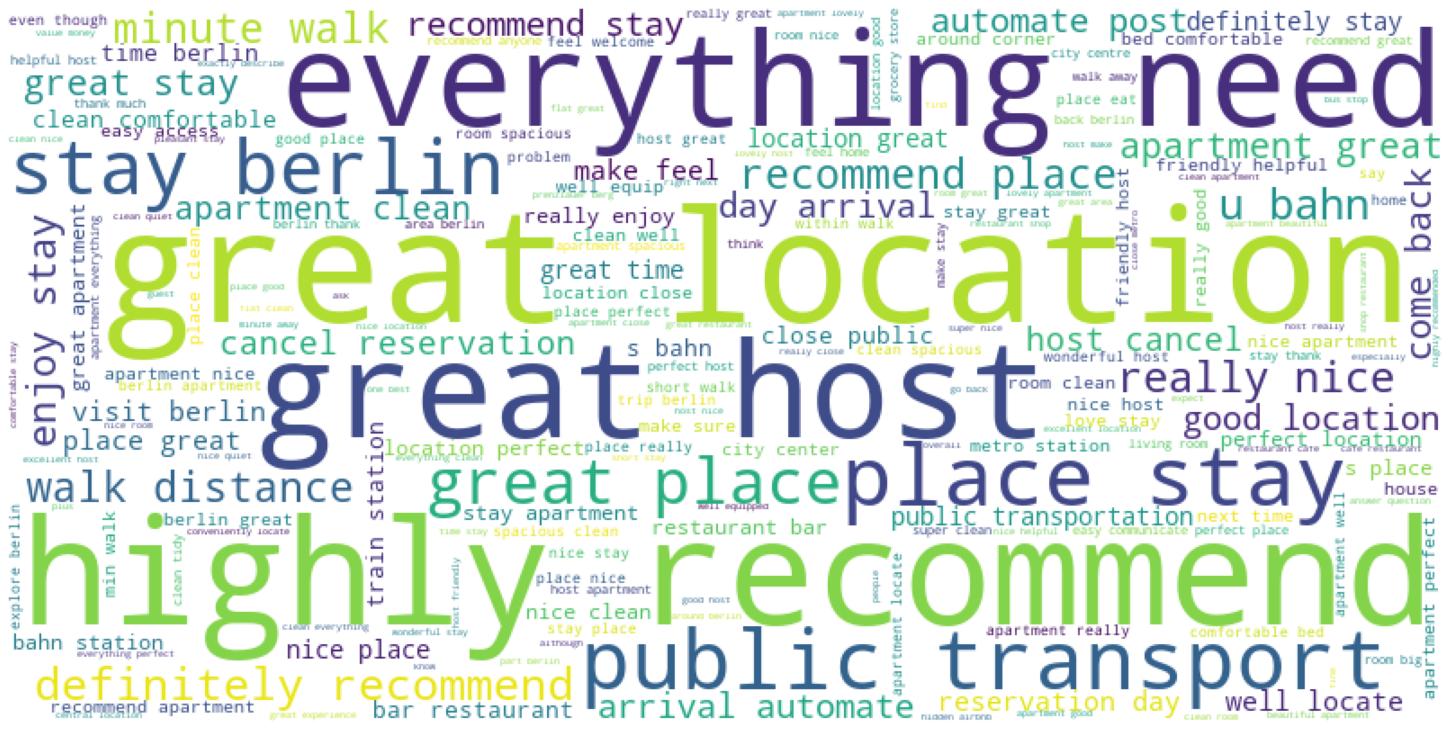

In [46]:
#We made a white wordcloud to fit our slides.
#Will be more pretty if we set background_color = "black"

text = " ".join(str(each) for each in engRev.comments_clean)
# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=400,background_color="white").generate(text)
plt.figure(figsize=(20,10))
# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

In [47]:
#Count the most popular characters
#Idk why we chose to do this

full_list = []  # list containing all words of all texts
for elmnt in engRev['comments_clean']:  # loop over lists in df
    full_list += elmnt  # append elements of lists to full list

val_counts = pd.Series(full_list).value_counts()  # make temporary Series to count

In [48]:
print(val_counts)

     6432565
e    5123588
a    3556654
t    3313222
o    2787499
      ...   
꒰          1
嚕          1
먀          1
엯          1
習          1
Length: 2304, dtype: int64


In [50]:
sa = pd.read_csv('numericComments.csv')

In [51]:
sa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271818 entries, 0 to 271817
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   listing_id      271817 non-null  float64
 1   reviewer_id     271818 non-null  float64
 2   comments_clean  271808 non-null  object 
 3   neg             271817 non-null  float64
 4   neu             271817 non-null  float64
 5   pos             271817 non-null  float64
 6   compound        271817 non-null  float64
 7   nb_chars        271816 non-null  float64
 8   nb_words        271816 non-null  float64
dtypes: float64(8), object(1)
memory usage: 18.7+ MB


In [52]:
sa.head()

listing_id  reviewer_id                                     comments_clean  \
0      2015.0   41944715.0  jan friendly welcome host apartment great area...   
1      2015.0   63697857.0       really nice area food park transport perfect   
2      2015.0   29323516.0  nice stay berlin thanks jan's premium situate ...   
3      2015.0    9025122.0  great location close mauerpark kastanienallee ...   
4      2015.0   73902920.0  apartment well locate close everything superma...   

   neg    neu    pos  compound  nb_chars  nb_words  
0  0.0  0.336  0.664    0.9628      92.0      16.0  
1  0.0  0.424  0.576    0.7778      44.0       7.0  
2  0.0  0.468  0.532    0.9716     203.0      29.0  
3  0.0  0.640  0.360    0.8074     115.0      15.0  
4  0.0  0.723  0.277    0.8316     190.0      26.0

In [53]:
print('Total number of comments(English and Other languages):  ', revSum.shape[0])
print('Total number of comments(Other languages) omitted:\t', revSum.shape[0]-sa.shape[0])

Total number of comments(English and Other languages):   401963
Total number of comments(Other languages) omitted:	 130145


In [54]:
sadata = sa.groupby(sa['listing_id']).agg({'compound':'mean'}).reset_index()
sadata = sadata.rename(columns = {'listing_id': 'id', 'compound':'mean_review_score'})
sadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17619 entries, 0 to 17618
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 17619 non-null  float64
 1   mean_review_score  17619 non-null  float64
dtypes: float64(2)
memory usage: 275.4 KB


In [55]:
sadata = sadata.merge(listingdata[['id']], how = 'right')

In [56]:
listingdata = pd.concat([listingdata, sadata], axis = 1).reindex(listingdata.index)
listingdata = listingdata.loc[:,~listingdata.columns.duplicated()]

#### Estimate Distance from Central

# Distance

In [57]:
distance = listingSum[['id','latitude', 'longitude', 'price','neighbourhood_group_cleansed']]
distance['price'] = distance['price'].str.replace('$', '')
distance['price'] = distance['price'].str.replace(',', '')
distance=distance.astype({'price':'float64'})
distance.head()

id   latitude  longitude  price neighbourhood_group_cleansed
0  2015  52.534537  13.402557   60.0                        Mitte
1  2695  52.548513  13.404553   17.0                       Pankow
2  3176  52.534996  13.417579   90.0                       Pankow
3  3309  52.498855  13.349065   26.0       Tempelhof - Schöneberg
4  7071  52.543157  13.415091   42.0                       Pankow

In [58]:
#Distance from Alexanderplatz

def haversine_distance_central(row):
    berlin_lat,berlin_long = radians(52.5220), radians(13.4133)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [59]:
#Distance from Central Berlin Railway Station

def haversine_distance_rail(row):
    berlin_lat,berlin_long = radians(52.5251), radians(13.3694)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [60]:
#Distance from Brandenburg Gate

def haversine_distance_gate(row):
    berlin_lat,berlin_long = radians(52.5163), radians(13.3777)
    R = 6373.0
    long = radians(row['longitude'])
    lat = radians(row['latitude'])
    
    dlon = long - berlin_long
    dlat = lat - berlin_lat
    a = sin(dlat / 2)**2 + cos(lat) * cos(berlin_lat) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [61]:
#Since Berlin doesn't have a fixed centre, we took the 3 most popular 'tourist' destinations, and averaged their coordinates/distance out to obtain a central point. 

distance['distance_central'] = distance.apply(haversine_distance_central,axis=1)
distance['distance_gate'] = distance.apply(haversine_distance_gate,axis=1)
distance['distance_railways'] = distance.apply(haversine_distance_rail,axis=1)
distance['distance_avg'] = ( distance['distance_central'] + distance['distance_gate'] + distance['distance_railways'] )/3.0

distance['distance_avg'].describe()

count    22552.000000
mean         4.959014
std          2.615288
min          1.213743
25%          3.465650
50%          4.464202
75%          5.809394
max         26.787107
Name: distance_avg, dtype: float64

In [62]:
distance.head()

id   latitude  longitude  price neighbourhood_group_cleansed  \
0  2015  52.534537  13.402557   60.0                        Mitte   
1  2695  52.548513  13.404553   17.0                       Pankow   
2  3176  52.534996  13.417579   90.0                       Pankow   
3  3309  52.498855  13.349065   26.0       Tempelhof - Schöneberg   
4  7071  52.543157  13.415091   42.0                       Pankow   

   distance_central  distance_gate  distance_railways  distance_avg  
0          1.572637       2.635257           2.477033      2.228309  
1          3.007811       4.017374           3.526773      3.517319  
2          1.474274       3.406999           3.440883      2.774052  
3          5.053431       2.742906           3.227526      3.674621  
4          2.356437       3.914804           3.686622      3.319288

In [63]:
distance.isnull().sum(axis = 0)

id                              0
latitude                        0
longitude                       0
price                           0
neighbourhood_group_cleansed    0
distance_central                0
distance_gate                   0
distance_railways               0
distance_avg                    0
dtype: int64

In [64]:
#Save meeeeeeee!
distance.to_csv('distance.csv', index=False)

In [65]:
distance = pd.read_csv('distance.csv')

In [66]:
distance.head()

id   latitude  longitude  price neighbourhood_group_cleansed  \
0  2015  52.534537  13.402557   60.0                        Mitte   
1  2695  52.548513  13.404553   17.0                       Pankow   
2  3176  52.534996  13.417579   90.0                       Pankow   
3  3309  52.498855  13.349065   26.0       Tempelhof - Schöneberg   
4  7071  52.543157  13.415091   42.0                       Pankow   

   distance_central  distance_gate  distance_railways  distance_avg  
0          1.572637       2.635257           2.477033      2.228309  
1          3.007811       4.017374           3.526773      3.517319  
2          1.474274       3.406999           3.440883      2.774052  
3          5.053431       2.742906           3.227526      3.674621  
4          2.356437       3.914804           3.686622      3.319288

In [68]:
distance = distance.drop(['latitude', 'longitude', 'price', 'neighbourhood_group_cleansed', 'distance_central',
                         'distance_gate', 'distance_railways'], axis =1)

In [69]:
distance = distance.merge(listingdata[['id']], how = 'right')

In [70]:
listingdata = pd.concat([listingdata, distance], axis = 1).reindex(listingdata.index)
listingdata = listingdata.loc[:,~listingdata.columns.duplicated()]

In [71]:
listingdata = listingdata.rename(columns = {'distance_avg': 'distance_from_central'})

In [72]:
listingdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22132 non-null  float64
 1   host_id                         22132 non-null  float64
 2   host_since                      22107 non-null  object 
 3   host_neighbourhood              17123 non-null  object 
 4   neighbourhood                   21018 non-null  object 
 5   latitude                        22132 non-null  float64
 6   longitude                       22132 non-null  float64
 7   property_type                   22132 non-null  object 
 8   room_type                       22132 non-null  object 
 9   accommodates                    22132 non-null  float64
 10  bathrooms                       22100 non-null  float64
 11  bedrooms                        22114 non-null  float64
 12  beds                            

# Predictor Variables

## Numeric

In [73]:
allnumData = pd.DataFrame(listingdata[['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'mean_review_score', 'distance_from_central']])
allnumData.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'mean_review_score',
       'distance_from_central'],
      dtype='object')

## UniVariate Analysis 

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:369: UserWarning:

Default bandwidth for data is 0; skipping density estimation.



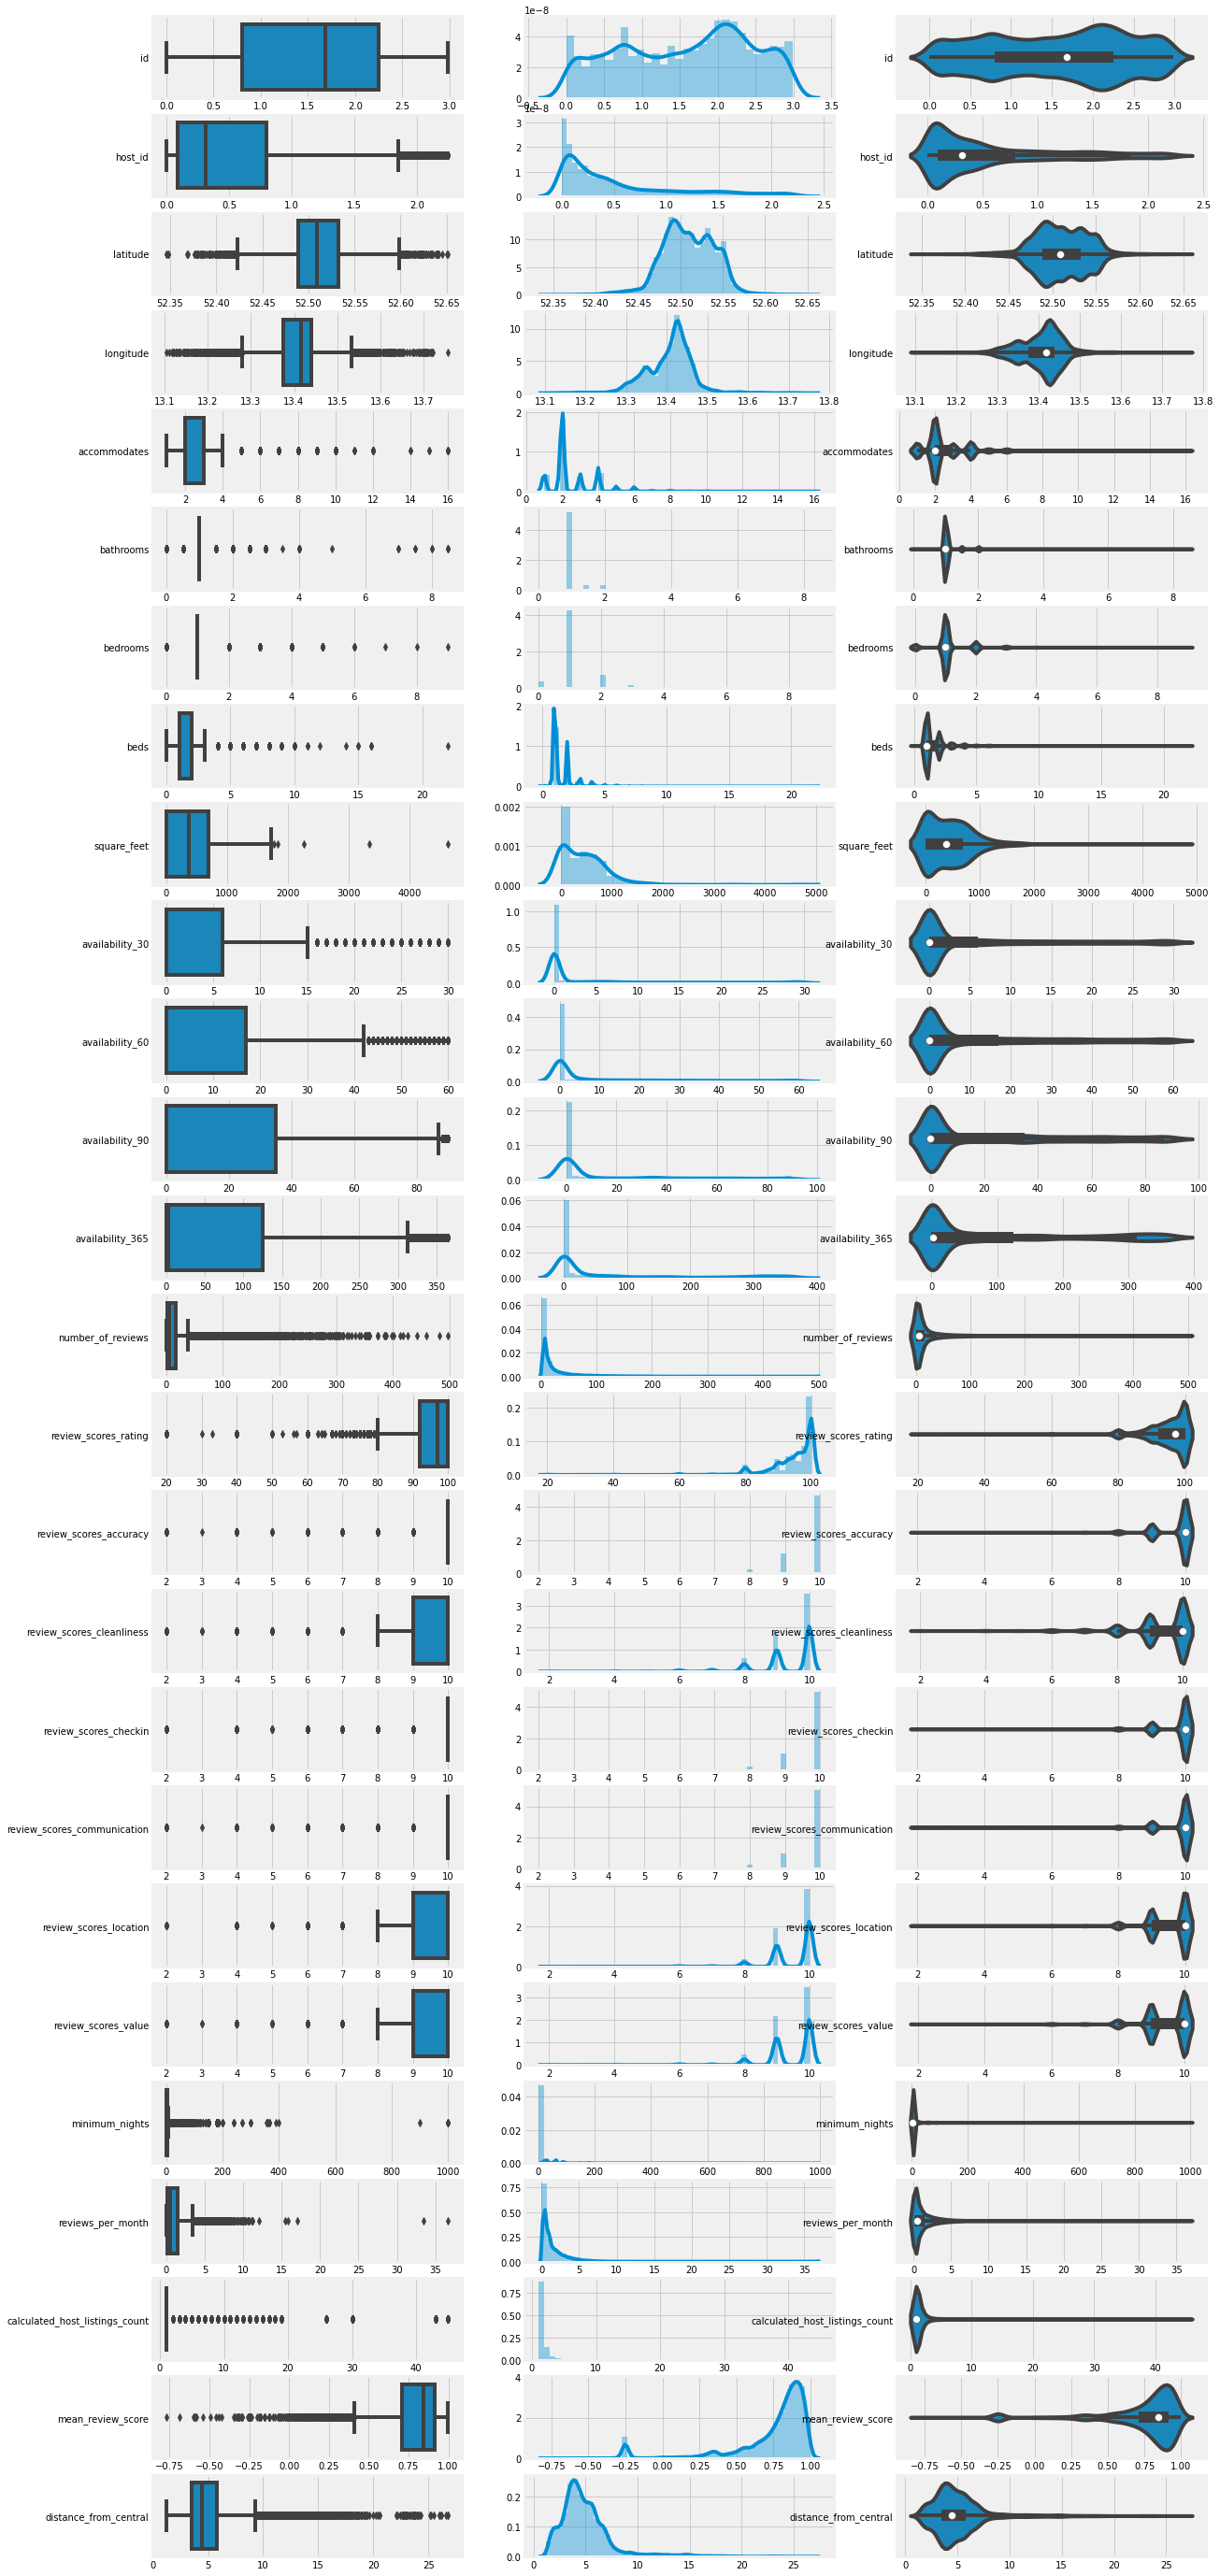

In [74]:
# Draw the distributions of all variables
f, axes = plt.subplots(26, 3, figsize=(18, 50))

count = 0
for var in allnumData:
    sb.boxplot(data = pd.DataFrame(allnumData[var]), orient = "h", ax = axes[count,0])
    sb.distplot(pd.DataFrame(allnumData[var]), ax = axes[count,1])
    sb.violinplot(data = pd.DataFrame(allnumData[var]), orient = "h", ax = axes[count,2])
    count += 1

Not all data has a normal distrbution. 

Most columns have extreme values.  

## Modify illogical data

In [75]:
print("Number of datas with 'square_feet' equals to 0:  ", allnumData[allnumData['square_feet'] == 0].shape[0])

Number of datas with 'square_feet' equals to 0:   123


In [76]:
# Replace data where 'square_feet' == 0 with null value. 
allnumData['square_feet'] = allnumData['square_feet'].replace([0], np.nan)

## MultiVariate Analysis(Numeric)

In [77]:
jointDF = pd.concat([allnumData, price], axis = 1).reindex(allnumData['id'].index)

### Geographical Analysis



# Cleaning Location Data

In [78]:
#Let's take a look at location data before plotting it
listingSum.head()

id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 sq meters. This wood...   
1                                                NaN   
2  This beautiful first floor apartment  is situa...   
3  First of all: I prefer short-notice bookings. ...   
4  Cozy and large room in the beautiful district ...   

                                               space  \
0  A+++ location! This „Einliegerwohnung“ is an e...   
1  In the summertime we are spending most of our ...   
2  1st floor (68m2) apartment on Kollwitzplatz/ P...   
3  Your room is really big and has 26 sqm, is ver...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description experiences_offered  \
0  Great location!  30 of 75 sq meters. This wood...                none   
1  In the summertime we are spending most of our ...                none   
2  This beautiful first floor apartment  is situa...                none   
3  First of all: I prefer short-notice bookings. ...                none   
4  Cozy and large room in the beautiful district ...                none   

                               neighborhood_overview  ... requires_license  \
0  It is located in the former East Berlin area o...  ...                t   
1                                                NaN  ...                t   
2  The neighbourhood is famous for its variety of...  ...                t   
3  My flat is in the middle of West-Berlin, direc...  ...                t   
4  Great neighborhood with plenty of Cafés, Baker...  ...                t   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN                NaN                f                        f   
1     NaN                NaN                f                        f   
2     NaN                NaN                t                        f   
3     NaN                NaN                f                        f   
4     NaN                NaN                f                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     flexible                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4                     moderate                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               4   
1                                f                               1   
2                                f                               1   
3                                f                               1   
4                                f                               1   

   reviews_per_month  
0               3.76  
1               1.42  
2               1.25  
3               0.39  
4               1.75  

[5 rows x 96 columns]

In [79]:
listingSum.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 96 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                22552 non-null  int64  
 1   listing_url                       22552 non-null  object 
 2   scrape_id                         22552 non-null  int64  
 3   last_scraped                      22552 non-null  object 
 4   name                              22493 non-null  object 
 5   summary                           21589 non-null  object 
 6   space                             14020 non-null  object 
 7   description                       22349 non-null  object 
 8   experiences_offered               22552 non-null  object 
 9   neighborhood_overview             11540 non-null  object 
 10  notes                             7215 non-null   object 
 11  transit                           13036 non-null  object 
 12  acce

In [80]:
#Checking neighbourhoods, not sure if we need to graph our grid by this later
listingSum.neighbourhood_group_cleansed.unique()

array(['Mitte', 'Pankow', 'Tempelhof - Schöneberg',
       'Friedrichshain-Kreuzberg', 'Neukölln', 'Charlottenburg-Wilm.',
       'Treptow - Köpenick', 'Steglitz - Zehlendorf', 'Reinickendorf',
       'Lichtenberg', 'Marzahn - Hellersdorf', 'Spandau'], dtype=object)

In [81]:
#Instead of dropping columns, we extract columns that we need
location = listingSum[['id','latitude', 'longitude', 'price','neighbourhood_group_cleansed']]
location.head()

id   latitude  longitude   price neighbourhood_group_cleansed
0  2015  52.534537  13.402557  $60.00                        Mitte
1  2695  52.548513  13.404553  $17.00                       Pankow
2  3176  52.534996  13.417579  $90.00                       Pankow
3  3309  52.498855  13.349065  $26.00       Tempelhof - Schöneberg
4  7071  52.543157  13.415091  $42.00                       Pankow

In [82]:
#Get rid of those pesky dollar signs
#Cast these strings to int
location.price = [x.strip('$') for x in location.price]
location['price'] = pd.to_numeric(location['price'],errors='coerce')
location.head()

id   latitude  longitude  price neighbourhood_group_cleansed
0  2015  52.534537  13.402557   60.0                        Mitte
1  2695  52.548513  13.404553   17.0                       Pankow
2  3176  52.534996  13.417579   90.0                       Pankow
3  3309  52.498855  13.349065   26.0       Tempelhof - Schöneberg
4  7071  52.543157  13.415091   42.0                       Pankow

In [83]:
location.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22552 entries, 0 to 22551
Data columns (total 5 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            22552 non-null  int64  
 1   latitude                      22552 non-null  float64
 2   longitude                     22552 non-null  float64
 3   price                         22511 non-null  float64
 4   neighbourhood_group_cleansed  22552 non-null  object 
dtypes: float64(3), int64(1), object(1)
memory usage: 881.1+ KB


In [84]:
location.to_csv('location.csv', index=False)

# ScatterPlot - Neighbourhood


<Figure size 1080x1080 with 0 Axes>

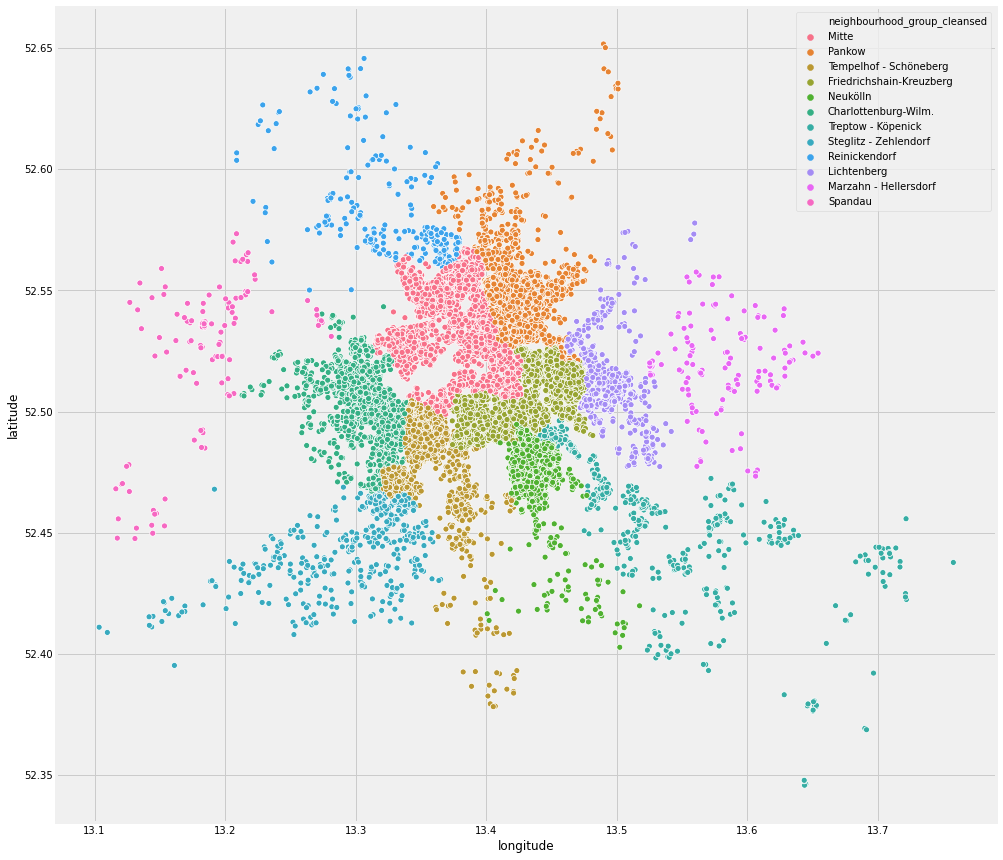

In [85]:
plt.figure(figsize=(15,15))
sb.scatterplot(location.longitude,location.latitude,hue=location.neighbourhood_group_cleansed)
plt.ioff()

# Interactive GeoPlots


In [86]:
#Selecting a central city point to center all graphs around - Berlin Central Railway station
center_coors = 52.5251, 13.3694

In [87]:
trace0=go.Scattermapbox(
            lat=location.latitude,
            lon=location.longitude,
          
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=location.price,
               
                colorscale="RdPu",
                cauto=False,
                cmax=120,
                showscale=True),
                text=location.price,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Price Density",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=go.Figure(
    data=data,
    layout=layout,
    )


iplot(figure)

# Changing density plot to grid-based
Makes it easier to visualise rough gauge of listing prices in an area

In [88]:
#Rounding coordinates by chosen precision creates a grid
rounding_num=0.015 
location["lon_mod"]=np.round(location.longitude/rounding_num,0)*rounding_num

#Adjusting for difference in actual distance between same numeric change in lat and lon to create a square grid
correction_coeff=0.5
location["lat_mod"]=np.round(location.latitude/(rounding_num*correction_coeff),0)*(rounding_num*correction_coeff)

In [89]:
#Let's make sure those decimal values don't run too much
location["lon_mod"]=np.round(location["lon_mod"],4)
location["lat_mod"]=np.round(location["lat_mod"],4)

In [90]:
#Creating grid dataframe with average unit prices for each tile. 
#Excluded tiles with sample below 3 as insufficient samples. 
df_map=location[["lat_mod","lon_mod","price"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()
df_map["sample_size"]=location[["lat_mod","lon_mod","id"]].groupby(["lat_mod","lon_mod"], as_index=False).count().id
df_map["neighbourhood_group_cleansed"]=location[["lat_mod","lon_mod","neighbourhood_group_cleansed"]].groupby(["lat_mod","lon_mod"], as_index=False).first().neighbourhood_group_cleansed
df_map["neighbourhood_group_cleansed"]=np.where(df_map.neighbourhood_group_cleansed.isna(),"Other",df_map.neighbourhood_group_cleansed)
df_map=df_map.query("sample_size>3")
df_map.reset_index(inplace=True)
df_map["geo_Id"]=df_map.index

In [91]:
#OMG, we actually cut it down to 345
df_map.shape

(345, 7)

In [92]:
df_map.head()

index  lat_mod  lon_mod      price  sample_size  \
0      7  52.3800   13.650  66.777778            9   
1     10  52.3875   13.425  37.500000            4   
2     22  52.4025   13.530  31.000000            4   
3     23  52.4025   13.545  47.800000            5   
4     31  52.4100   13.260  49.000000            4   

  neighbourhood_group_cleansed  geo_Id  
0           Treptow - Köpenick       0  
1       Tempelhof - Schöneberg       1  
2           Treptow - Köpenick       2  
3           Treptow - Köpenick       3  
4        Steglitz - Zehlendorf       4

In [93]:
#Our very pretty grid based ones

data=[]
trace0=dict(
            lat=df_map.lat_mod,
            lon=df_map.lon_mod,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(

                size=18, 
                color=df_map.price,
                opacity=0.6,
                colorscale="Rdpu",
                cauto=False,
                cmax=120,
                showscale=True),
                text=df_map.price,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Price by gridplot",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=data,
    layout=layout
    )


iplot(figure)

In [94]:
#SAVE, SAVE, SAVE
df_map.to_csv('df_map.csv', index=False)

### Remaining Numeric Variables

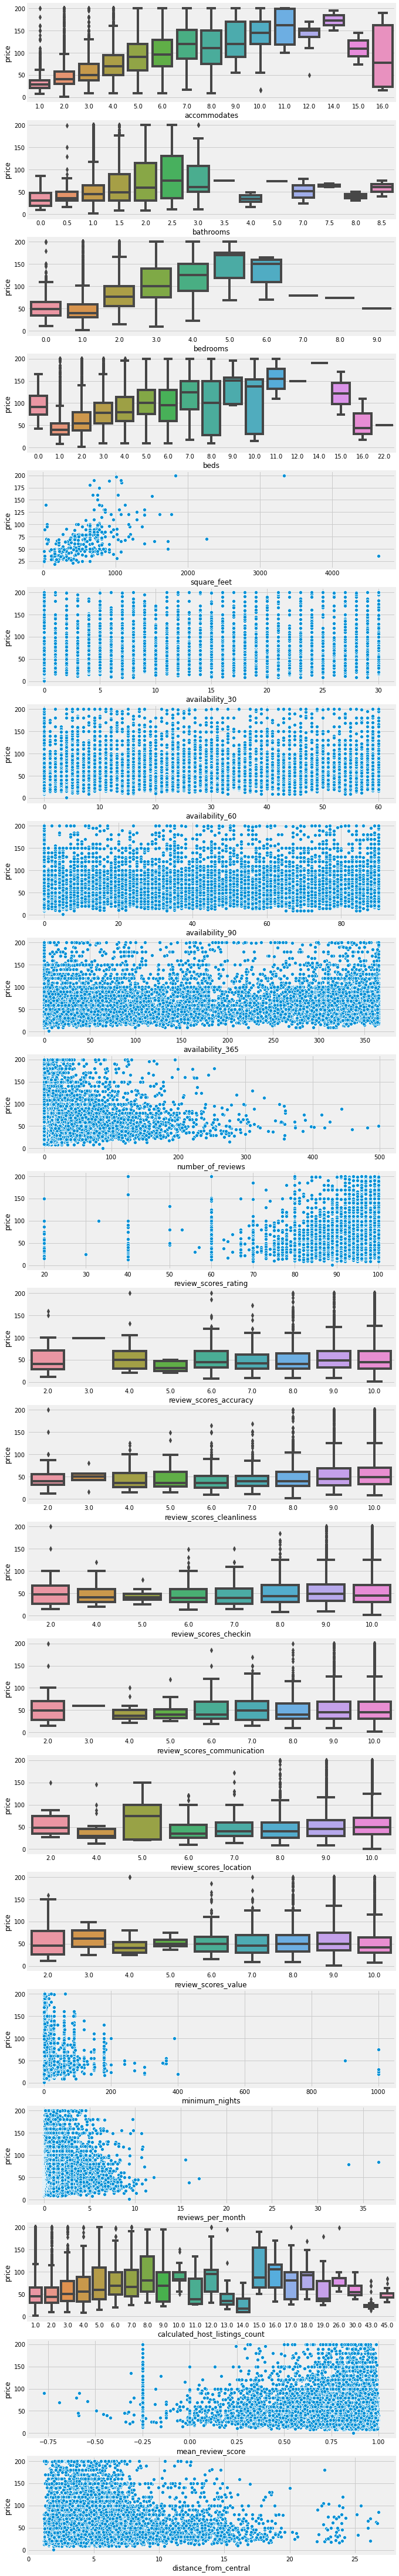

In [95]:
f, axes = plt.subplots(22, 1, figsize = (10, 80))

sb.boxplot(data = jointDF, x = 'accommodates', y = 'price', ax = axes[0])
sb.boxplot(data = jointDF, x = 'bathrooms', y = 'price', ax = axes[1])
sb.boxplot(data = jointDF, x = 'bedrooms', y = 'price', ax = axes[2])
sb.boxplot(data = jointDF, x = 'beds', y = 'price', ax = axes[3])
sb.scatterplot(data = jointDF, x = 'square_feet', y = 'price', ax = axes[4])
sb.scatterplot(data = jointDF, x = 'availability_30', y = 'price', ax = axes[5])
sb.scatterplot(data = jointDF, x = 'availability_60', y = 'price', ax = axes[6])
sb.scatterplot(data = jointDF, x = 'availability_90', y = 'price', ax = axes[7])
sb.scatterplot(data = jointDF, x = 'availability_365', y = 'price', ax = axes[8])
sb.scatterplot(data = jointDF, x = 'number_of_reviews', y = 'price', ax = axes[9])
sb.scatterplot(data = jointDF, x = 'review_scores_rating', y = 'price', ax = axes[10])
sb.boxplot(data = jointDF, x = 'review_scores_accuracy', y = 'price', ax = axes[11])
sb.boxplot(data = jointDF, x = 'review_scores_cleanliness', y = 'price', ax = axes[12])
sb.boxplot(data = jointDF, x = 'review_scores_checkin', y = 'price', ax = axes[13])
sb.boxplot(data = jointDF, x = 'review_scores_communication', y = 'price', ax = axes[14])
sb.boxplot(data = jointDF, x = 'review_scores_location', y = 'price', ax = axes[15])
sb.boxplot(data = jointDF, x = 'review_scores_value', y = 'price', ax = axes[16])
sb.scatterplot(data = jointDF, x = 'minimum_nights', y = 'price', ax = axes[17])
sb.scatterplot(data = jointDF, x = 'reviews_per_month', y = 'price', ax = axes[18])
sb.boxplot(data = jointDF, x = 'calculated_host_listings_count', y = 'price', ax = axes[19])
sb.scatterplot(data = jointDF, x = 'mean_review_score', y = 'price', ax = axes[20])
sb.scatterplot(data = jointDF, x = 'distance_from_central', y = 'price', ax = axes[21])

    
    

'accomodates', 'bathrooms', 'bedrooms', 'beds' and 'square_feet' generally has a positive correlation with 'price'. 

'number_of_reviews'generally has a negative correlation with 'price', which may not be intuitive. 

'review_scores_rating' generally has a positive correlation with 'price'. 

'minimum_nights' generally has a negative correlation with 'price'. 

'price' generally increases and then decreases as 'calculated_host_listings_count' increases. 

'mean_review_score' generally has a positive correlation with 'price' whereas 'distance_from_central' generally has a negative correlation with 'price'. 

## Imputation using MissForest

In [96]:
allnumData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22132 non-null  float64
 1   host_id                         22132 non-null  float64
 2   latitude                        22132 non-null  float64
 3   longitude                       22132 non-null  float64
 4   accommodates                    22132 non-null  float64
 5   bathrooms                       22100 non-null  float64
 6   bedrooms                        22114 non-null  float64
 7   beds                            22098 non-null  float64
 8   square_feet                     311 non-null    float64
 9   availability_30                 22132 non-null  float64
 10  availability_60                 22132 non-null  float64
 11  availability_90                 22132 non-null  float64
 12  availability_365                

Huge Number of missing data, hence filling missing values with mean values may not give an accurate representation of the data.

Additionally, most columns have extreme values, hence filling missing values with median values would be a better option over filling missing values with mean values. 

In [97]:
# Exclude 'id', 'host_id', 'longitude' and 'latitude' from the columns to be considered when doing imputation. 
data_to_be_imputed = allnumData.drop(['id', 'host_id', 'longitude', 'latitude'], axis = 1)

In [99]:
!pip install missingpy

     |████████████████████████████████| 49 kB 978 kB/s eta 0:00:01


In [100]:
from missingpy import MissForest
imputer = MissForest()
imputed_data = pd.DataFrame(imputer.fit_transform(data_to_be_imputed))

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning:

The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.



Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3


In [101]:
allnumData = allnumData.merge(allnumData['id'], how = 'right')
allnumData = pd.concat([allnumData[['id', 'host_id','longitude', 'latitude']], imputed_data], axis = 1, ignore_index = True).reindex(allnumData['id'].index)
allnumData = allnumData.loc[:,~allnumData.columns.duplicated()]

In [102]:
allnumData.columns = ['id', 'host_id', 'latitude', 'longitude', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'square_feet', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'number_of_reviews',
       'review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin',
       'review_scores_communication', 'review_scores_location',
       'review_scores_value', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'mean_review_score', 'distance_from_central']

In [103]:
allnumData['mean_review_score'] = round(allnumData['mean_review_score'], 3)
allnumData['distance_from_central'] = round(allnumData['distance_from_central'], 3)
allnumData.head()

id  host_id   latitude  longitude  accommodates  bathrooms  bedrooms  \
0  2015.0   2217.0  13.402557  52.534537           3.0        1.0       1.0   
1  2695.0   2986.0  13.404553  52.548513           2.0        1.0       1.0   
2  3176.0   3718.0  13.417579  52.534996           4.0        1.0       1.0   
3  3309.0   4108.0  13.349065  52.498855           2.0        1.0       1.0   
4  7071.0  17391.0  13.415091  52.543157           2.0        1.0       1.0   

   beds  square_feet  availability_30  ...  review_scores_cleanliness  \
0   2.0       444.61              0.0  ...                        9.0   
1   1.0       410.90              0.0  ...                       10.0   
2   2.0       720.00              0.0  ...                        9.0   
3   1.0       506.22              0.0  ...                        9.0   
4   2.0       330.97             15.0  ...                       10.0   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0                   10.0                         10.0                    10.0   
1                   10.0                         10.0                    10.0   
2                    9.0                          9.0                    10.0   
3                    9.0                         10.0                     9.0   
4                   10.0                         10.0                    10.0   

   review_scores_value  minimum_nights  reviews_per_month  \
0                  9.0             4.0               3.76   
1                 10.0             2.0               1.42   
2                  9.0            62.0               1.25   
3                  9.0             5.0               0.39   
4                  9.0             2.0               1.75   

   calculated_host_listings_count  mean_review_score  distance_from_central  
0                             4.0              0.871                  2.228  
1                             1.0              0.906                  3.517  
2                             1.0              0.924                  2.774  
3                             1.0              0.815                  3.675  
4                             1.0              0.900                  3.319  

[5 rows x 26 columns]

In [104]:
allnumData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22131
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22132 non-null  float64
 1   host_id                         22132 non-null  float64
 2   latitude                        22132 non-null  float64
 3   longitude                       22132 non-null  float64
 4   accommodates                    22132 non-null  float64
 5   bathrooms                       22132 non-null  float64
 6   bedrooms                        22132 non-null  float64
 7   beds                            22132 non-null  float64
 8   square_feet                     22132 non-null  float64
 9   availability_30                 22132 non-null  float64
 10  availability_60                 22132 non-null  float64
 11  availability_90                 22132 non-null  float64
 12  availability_365                

## Generalising columns using Principal Component Analysis

### Identify clusters with correlation coefficient matrix

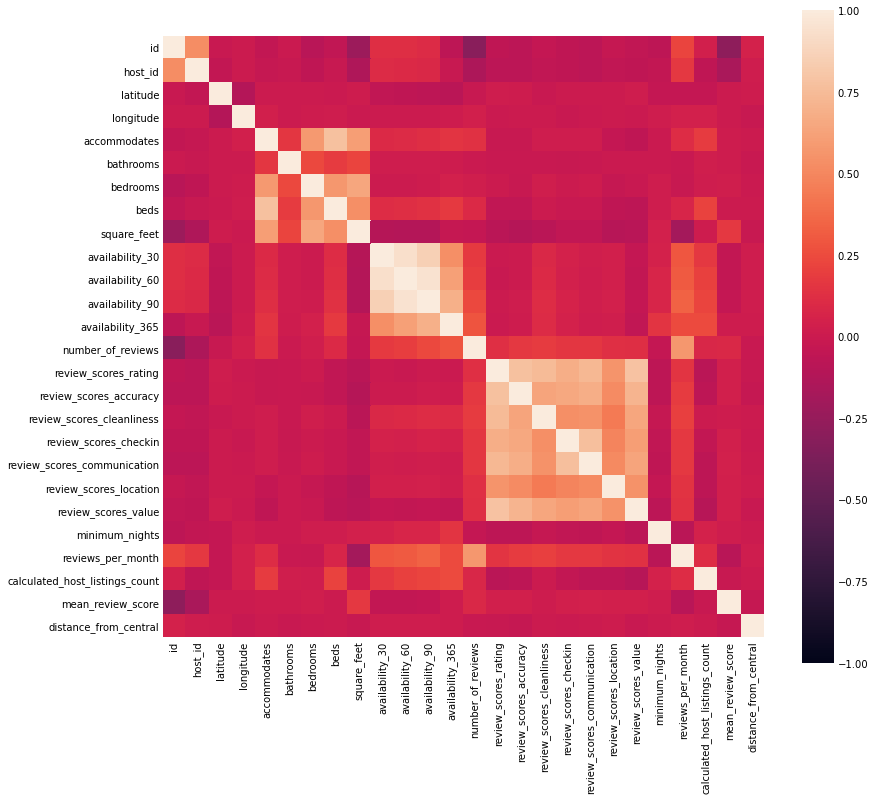

In [105]:
f = plt.subplots(figsize=(12, 12))
sb.heatmap(allnumData.corr(), vmin = -1, vmax = 1, square = True)

From the above, it is shown that some variables have higher correlation to one another as compared to the rest. 
Hece, we will cluster these variables. 

In [106]:
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

Since not all data has a normal distribution, we choose normalisation to scale our data. 

Scale data first before doing PCA. 

In [107]:
cluster1 = pd.DataFrame(allnumData[['accommodates', 'bathrooms', 'bedrooms', 'beds', 'square_feet']])
cluster2 = pd.DataFrame(allnumData[['availability_30', 'availability_60', 'availability_90', 'availability_365']])
cluster3 = pd.DataFrame(allnumData[['review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value']])

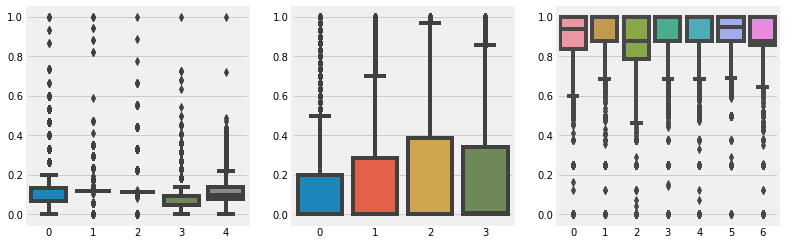

In [108]:
# scale first before doing PCA
cluster1 = min_max_scaler.fit_transform(cluster1)
cluster2 = min_max_scaler.fit_transform(cluster2)
cluster3 = min_max_scaler.fit_transform(cluster3)

f, axes = plt.subplots(1, 3, figsize = (12, 4))
sb.boxplot(data = cluster1, ax = axes[0])
sb.boxplot(data = cluster2, ax = axes[1])
sb.boxplot(data = cluster3, ax = axes[2])

In [109]:
pca = decomposition.PCA(n_components = 5)
pc = pca.fit_transform(cluster1)
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4', 'PC5'])

Draw scree plot to have an idea how different PCs explain different percentage of variance of the data. 

[0.70136291 0.13296105 0.06433087 0.06141233 0.03993284]


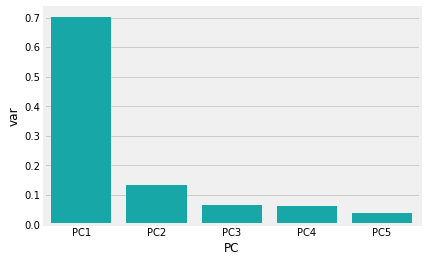

In [110]:
print(pca.explained_variance_ratio_)
df = pd.DataFrame({'PC':['PC1','PC2','PC3','PC4', 'PC5'], 'var':pca.explained_variance_ratio_})
sb.barplot(x='PC',y="var", data=df, color="c")

We include the PC(s) such that they explain more than 75% of the variance

In [111]:
newfeatures = pd.DataFrame(pc_df[['PC1', 'PC2']])
newfeatures = newfeatures.rename(columns = {'PC1': 'attribute_1', 'PC2': 'attribute_2'}) 
newfeatures.head()

attribute_1  attribute_2
0     0.012186    -0.039256
1    -0.055614     0.001619
2     0.082478    -0.055150
3    -0.048342     0.008889
4    -0.045766    -0.011024

In [112]:
pca = decomposition.PCA(n_components = 4)
pc = pca.fit_transform(cluster2)
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4'])

[0.81950028 0.1460056  0.02844178 0.00605234]


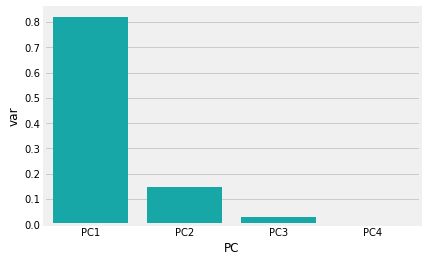

In [113]:
print(pca.explained_variance_ratio_)
df = pd.DataFrame({'PC':['PC1','PC2','PC3','PC4'], 'var':pca.explained_variance_ratio_})
sb.barplot(x='PC',y="var", data=df, color="c")

In [114]:
newfeatures = pd.concat([newfeatures, pc_df[['PC1']]], axis = 1)
newfeatures = newfeatures.rename(columns = {'PC1': 'availability_1'})
newfeatures.head()

attribute_1  attribute_2  availability_1
0     0.012186    -0.039256        0.283496
1    -0.055614     0.001619       -0.385104
2     0.082478    -0.055150       -0.105338
3    -0.048342     0.008889        0.127216
4    -0.045766    -0.011024        0.263572

In [115]:
pca = decomposition.PCA(n_components = 7)
pc = pca.fit_transform(cluster3)
pc_df = pd.DataFrame(data = pc, columns = ['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7'])

[0.69388971 0.0950913  0.06635809 0.05327053 0.03927807 0.0286713
 0.02344101]


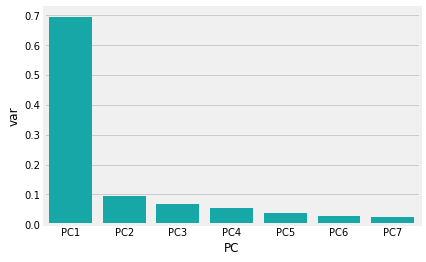

In [116]:
print(pca.explained_variance_ratio_)
df = pd.DataFrame({'PC':['PC1', 'PC2','PC3','PC4', 'PC5', 'PC6', 'PC7'], 'var':pca.explained_variance_ratio_})
sb.barplot(x='PC',y="var", data=df, color="c")

In [117]:
newfeatures = pd.concat([newfeatures, pc_df[['PC1', 'PC2']]], axis = 1)
newfeatures = newfeatures.rename(columns = {'PC1': 'review_1', 'PC2': 'review_2'})
newfeatures.head()

attribute_1  attribute_2  availability_1  review_1  review_2
0     0.012186    -0.039256        0.283496 -0.083592 -0.084450
1    -0.055614     0.001619       -0.385104 -0.228185  0.015304
2     0.082478    -0.055150       -0.105338  0.055192  0.023527
3    -0.048342     0.008889        0.127216  0.064889  0.008514
4    -0.045766    -0.011024        0.263572 -0.157390  0.014489

In [118]:
numData = pd.DataFrame(allnumData[['id', 'host_id', 'minimum_nights', 'reviews_per_month', 'calculated_host_listings_count', 'mean_review_score', 'distance_from_central']])
numData = pd.concat([numData , newfeatures], axis = 1).reindex(numData['id'].index)
numData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22131
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              22132 non-null  float64
 1   host_id                         22132 non-null  float64
 2   minimum_nights                  22132 non-null  float64
 3   reviews_per_month               22132 non-null  float64
 4   calculated_host_listings_count  22132 non-null  float64
 5   mean_review_score               22132 non-null  float64
 6   distance_from_central           22132 non-null  float64
 7   attribute_1                     22132 non-null  float64
 8   attribute_2                     22132 non-null  float64
 9   availability_1                  22132 non-null  float64
 10  review_1                        22132 non-null  float64
 11  review_2                        22132 non-null  float64
dtypes: float64(12)
memory usage: 2.2

#### Number of numeric predictors(excluding 'id', 'host_id', 'latitude' and 'longitude'  reduced from 22 to 10 !!! :)

## Object

In [119]:
objData = pd.DataFrame(listingdata[['host_since', 'host_neighbourhood', 'neighbourhood', 'neighbourhood_group', 'property_type', 'room_type', 'cancellation_policy', 'last_review']])
objData.columns

Index(['host_since', 'host_neighbourhood', 'neighbourhood',
       'neighbourhood_group', 'property_type', 'room_type',
       'cancellation_policy', 'last_review'],
      dtype='object')

In [120]:
objData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   host_since           22107 non-null  object
 1   host_neighbourhood   17123 non-null  object
 2   neighbourhood        21018 non-null  object
 3   neighbourhood_group  22132 non-null  object
 4   property_type        22132 non-null  object
 5   room_type            22132 non-null  object
 6   cancellation_policy  22132 non-null  object
 7   last_review          18340 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


## EDA(Object)

In [121]:
jointDF = pd.concat([objData, price], axis = 1).reindex(objData['neighbourhood'].index)

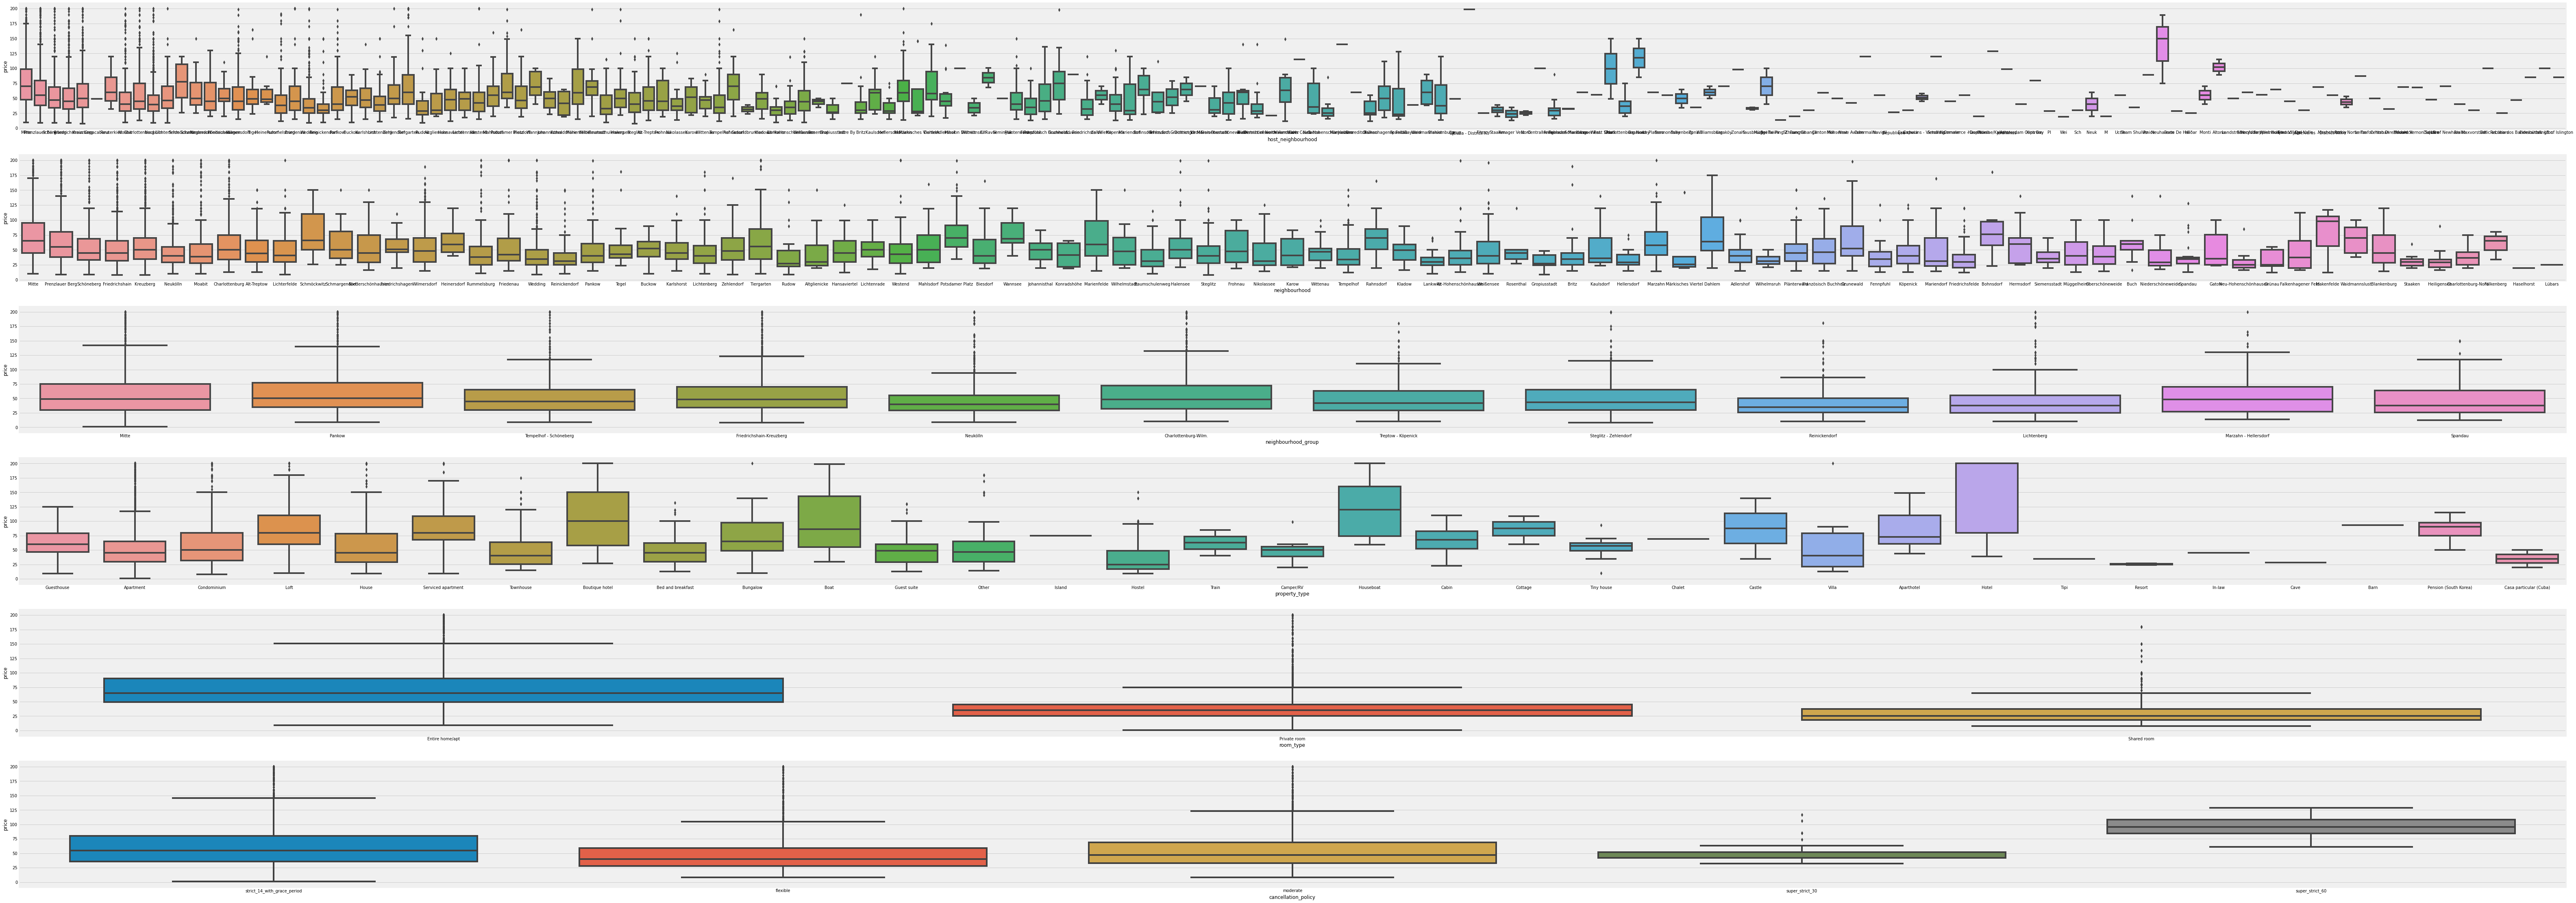

In [122]:
# first graph is unzoomed, second graph is zoomed 

f, axes = plt.subplots(6, 1, figsize = (100, 40))

sb.boxplot(data = jointDF, x = 'host_neighbourhood', y = 'price', ax = axes[0])
sb.boxplot(data = jointDF, x = 'neighbourhood', y = 'price', ax = axes[1])
sb.boxplot(data = jointDF, x = 'neighbourhood_group', y = 'price', ax = axes[2])
sb.boxplot(data = jointDF, x = 'property_type', y = 'price', ax = axes[3])
sb.boxplot(data = jointDF, x = 'room_type', y = 'price', ax = axes[4])
sb.boxplot(data = jointDF, x = 'cancellation_policy', y = 'price', ax = axes[5])



Different 'host_neighbourhood' and 'neighbourhood' generally has an effect on price. 

Diffferent 'neighbourhood_group' seems to have little effect on price, which may be counter-intuitive. 

For 'property_type', 'Hotel' generally has higher price than other 'property_type'. 

For 'property_type', 'Entire home/apt' generally has higher price than other 'property_type'. 

For 'cancellation_policy', 'super_strict_60' generally has higher price than other 'cancellation_policy'.

## Imputation using Forward Fill and Convert from Object to Numeric

In [123]:
objData['host_since'] = objData['host_since'].fillna(method = 'ffill')
objData['last_review'] = objData['last_review'].fillna(method = 'ffill')
objData['host_neighbourhood'] = objData['host_neighbourhood'].fillna(method = 'ffill')
objData['neighbourhood'] = objData['neighbourhood'].fillna(method = 'ffill')

### Convert 'host_since' and 'last-review' with datetime data type

In [124]:
objData['host_since'] = pd.to_datetime(objData['host_since'])
objData['last_review'] = pd.to_datetime(objData['last_review'])

Introduce a reference period and find the time difference between this reference period and 'host_since' as well as 'last_review' columns

In [125]:
theDate = "2021-01-01"
objData['reference_period'] = theDate
objData['reference_period'] = pd.to_datetime(objData['reference_period'])
objData['host_since_period'] = (objData['reference_period'] - objData['host_since']).dt.days
objData['last_review_period'] = (objData['reference_period'] - objData['last_review']).dt.days
objData.head()

host_since host_neighbourhood    neighbourhood     neighbourhood_group  \
0 2008-08-18              Mitte            Mitte                   Mitte   
1 2008-09-16    Prenzlauer Berg            Mitte                  Pankow   
2 2008-10-19    Prenzlauer Berg  Prenzlauer Berg                  Pankow   
3 2008-11-07         Schöneberg       Schöneberg  Tempelhof - Schöneberg   
4 2009-05-16    Prenzlauer Berg  Prenzlauer Berg                  Pankow   

  property_type        room_type          cancellation_policy last_review  \
0    Guesthouse  Entire home/apt  strict_14_with_grace_period  2018-10-28   
1     Apartment     Private room                     flexible  2018-10-01   
2     Apartment  Entire home/apt  strict_14_with_grace_period  2017-03-20   
3     Apartment     Private room  strict_14_with_grace_period  2018-08-16   
4     Apartment     Private room                     moderate  2018-11-04   

  reference_period  host_since_period  last_review_period  
0       2021-01-01               4519                 796  
1       2021-01-01               4490                 823  
2       2021-01-01               4457                1383  
3       2021-01-01               4438                 869  
4       2021-01-01               4248                 789

In [126]:
objData = objData.drop(['host_since', 'last_review', 'reference_period'], axis = 1)
objData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   host_neighbourhood   22132 non-null  object
 1   neighbourhood        22132 non-null  object
 2   neighbourhood_group  22132 non-null  object
 3   property_type        22132 non-null  object
 4   room_type            22132 non-null  object
 5   cancellation_policy  22132 non-null  object
 6   host_since_period    22132 non-null  int64 
 7   last_review_period   22132 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


### Convert remaining columns with OHE 

In [127]:
print("Number of unique data under", objData.columns[0], "column: \t", objData['host_neighbourhood'].describe().iloc[1])
print("Number of unique data under", objData.columns[1], "column: \t", objData['neighbourhood'].describe().iloc[1])
print("Number of unique data under", objData.columns[2], "column: ", objData['neighbourhood_group'].describe().iloc[1],)
print("Number of unique data under", objData.columns[3], "column: \t", objData['property_type'].describe().iloc[1])
print("Number of unique data under", objData.columns[4], "column: \t\t", objData['room_type'].describe().iloc[1])
print("Number of unique data under", objData.columns[5], "column: ", objData['cancellation_policy'].describe().iloc[1])

Number of unique data under host_neighbourhood column: 	 180
Number of unique data under neighbourhood column: 	 91
Number of unique data under neighbourhood_group column:  12
Number of unique data under property_type column: 	 33
Number of unique data under room_type column: 		 3
Number of unique data under cancellation_policy column:  5


Have a rough idea of the counts for each unique data, and what to generalise. 

In [128]:
objData['host_neighbourhood'].value_counts().head(20)

Neukölln           3319
Prenzlauer Berg    2815
Kreuzberg          2756
Friedrichshain     2545
Mitte              1996
Wedding            1455
Schöneberg         1091
Charlottenburg      828
Moabit              797
Wilmersdorf         463
Pankow              301
Tempelhof           270
Rummelsburg         244
Weißensee           186
Tiergarten          170
Lichtenberg         169
Alt-Treptow         154
Reinickendorf       151
Steglitz            142
Westend             114
Name: host_neighbourhood, dtype: int64

In [129]:
objData['neighbourhood'].value_counts().head(25)

Neukölln           3383
Prenzlauer Berg    2885
Kreuzberg          2742
Friedrichshain     2628
Mitte              1941
Wedding            1478
Schöneberg         1095
Moabit              808
Charlottenburg      779
Wilmersdorf         482
Pankow              295
Rummelsburg         255
Tempelhof           249
Weißensee           203
Lichtenberg         180
Alt-Treptow         167
Steglitz            160
Tiergarten          159
Reinickendorf       149
Westend             120
Friedenau            98
Lichterfelde         93
Zehlendorf           87
Baumschulenweg       82
Friedrichsfelde      70
Name: neighbourhood, dtype: int64

In [130]:
objData['property_type'].value_counts().head(25)

Apartment                19963
Condominium                596
Loft                       426
House                      380
Serviced apartment         145
Hostel                     123
Townhouse                   94
Guest suite                 73
Bed and breakfast           64
Guesthouse                  54
Other                       44
Boutique hotel              33
Hotel                       31
Bungalow                    19
Tiny house                  12
Camper/RV                   11
Boat                        11
Villa                        8
Pension (South Korea)        7
Houseboat                    7
Cabin                        6
Aparthotel                   6
Cottage                      4
Resort                       3
Train                        2
Name: property_type, dtype: int64

For 'host_neighbourhood' and 'neighbourhood' and 'property' column, we group the unique data that is not in Top 12 as 'Other'. 
For 'property' column, we group the unique data that is not in Top 6 as 'Other'

In [131]:
top12_A = objData['host_neighbourhood'].value_counts()[:12].index
top12_B = objData['neighbourhood'].value_counts()[:12].index
top12_C = objData['property_type'].value_counts()[:6].index

objData.loc[~objData['host_neighbourhood'].isin(top12_A), 'host_neighbourhood'] = 'Other'
objData.loc[~objData['neighbourhood'].isin(top12_B), 'neighbourhood'] = 'Other'
objData.loc[~objData['property_type'].isin(top12_C), 'property_type'] = 'Other'

In [132]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()

objData_cat = objData[['host_neighbourhood', 'neighbourhood', 'neighbourhood_group', 'property_type', 'room_type', 'cancellation_policy']]
ohe.fit(objData_cat)
objData_cat_ohe = pd.DataFrame(ohe.transform(objData_cat).toarray(), 
                              columns=ohe.get_feature_names(objData_cat.columns))
objData_cat_ohe.index = objData.index

OneHotEncoder()

In [133]:
# Combining all the objData
objData_ohe = pd.concat([objData[['host_since_period', 'last_review_period']], objData_cat_ohe], 
                           sort = False, axis = 1).reindex(index=objData_cat_ohe.index)

objData_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 55 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   host_since_period                                22132 non-null  int64  
 1   last_review_period                               22132 non-null  int64  
 2   host_neighbourhood_Charlottenburg                22132 non-null  float64
 3   host_neighbourhood_Friedrichshain                22132 non-null  float64
 4   host_neighbourhood_Kreuzberg                     22132 non-null  float64
 5   host_neighbourhood_Mitte                         22132 non-null  float64
 6   host_neighbourhood_Moabit                        22132 non-null  float64
 7   host_neighbourhood_Neukölln                      22132 non-null  float64
 8   host_neighbourhood_Other                         22132 non-null  float64
 9   host_neighbourhood_Pankow   

# Combining both numeric and object data

In [134]:
numData.index = objData_ohe.index
alldata = pd.concat([numData, objData_ohe], axis = 1)

In [135]:
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               22132 non-null  float64
 1   host_id                                          22132 non-null  float64
 2   minimum_nights                                   22132 non-null  float64
 3   reviews_per_month                                22132 non-null  float64
 4   calculated_host_listings_count                   22132 non-null  float64
 5   mean_review_score                                22132 non-null  float64
 6   distance_from_central                            22132 non-null  float64
 7   attribute_1                                      22132 non-null  float64
 8   attribute_2                                      22132 non-null  float64
 9   availability_1              

## Scale(Normalise)

Since not all data has a normal distribution, we choose normalisation to scale our data. 

In [136]:
alldata_z = pd.DataFrame(min_max_scaler.fit_transform(alldata[['minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count' , 'mean_review_score', 'distance_from_central', 'host_since_period', 'last_review_period']]))
alldata_z.index = alldata.index

In [137]:
alldata_z.columns = ['minimum_nights', 'reviews_per_month','calculated_host_listings_count', 'mean_review_score', 'distance_from_central', 'host_since_period', 'last_review_period']

alldata_z = pd.concat([numData[['id', 'host_id']], alldata_z, alldata.drop(['id', 'host_id', 'minimum_nights', 'reviews_per_month',
       'calculated_host_listings_count', 'mean_review_score', 'distance_from_central', 'host_since_period', 'last_review_period'], axis = 1)], axis =1)

In [138]:
alldata_z.head()

id  host_id  minimum_nights  reviews_per_month  \
0  2015.0   2217.0        0.003003           0.102291   
1  2695.0   2986.0        0.001001           0.038462   
2  3176.0   3718.0        0.061061           0.033824   
3  3309.0   4108.0        0.004004           0.010366   
4  7071.0  17391.0        0.001001           0.047463   

   calculated_host_listings_count  mean_review_score  distance_from_central  \
0                        0.068182           0.927684               0.039651   
1                        0.000000           0.947458               0.090056   
2                        0.000000           0.957627               0.061002   
3                        0.000000           0.896045               0.096234   
4                        0.000000           0.944068               0.082313   

   host_since_period  last_review_period  attribute_1  ...  \
0           1.000000            0.003362     0.012186  ...   
1           0.992229            0.012441    -0.055614  ...   
2           0.983387            0.200740     0.082478  ...   
3           0.978296            0.027909    -0.048342  ...   
4           0.927385            0.001009    -0.045766  ...   

   property_type_Other  property_type_Serviced apartment  \
0                  1.0                               0.0   
1                  0.0                               0.0   
2                  0.0                               0.0   
3                  0.0                               0.0   
4                  0.0                               0.0   

   room_type_Entire home/apt  room_type_Private room  room_type_Shared room  \
0                        1.0                     0.0                    0.0   
1                        0.0                     1.0                    0.0   
2                        1.0                     0.0                    0.0   
3                        0.0                     1.0                    0.0   
4                        0.0                     1.0                    0.0   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                           0.0                           0.0   
1                           1.0                           0.0   
2                           0.0                           0.0   
3                           0.0                           0.0   
4                           0.0                           1.0   

   cancellation_policy_strict_14_with_grace_period  \
0                                              1.0   
1                                              0.0   
2                                              1.0   
3                                              1.0   
4                                              0.0   

   cancellation_policy_super_strict_30  cancellation_policy_super_strict_60  
0                                  0.0                                  0.0  
1                                  0.0                                  0.0  
2                                  0.0                                  0.0  
3                                  0.0                                  0.0  
4                                  0.0                                  0.0  

[5 rows x 67 columns]

In [139]:
alldata_z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22132 entries, 0 to 22551
Data columns (total 67 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   id                                               22132 non-null  float64
 1   host_id                                          22132 non-null  float64
 2   minimum_nights                                   22132 non-null  float64
 3   reviews_per_month                                22132 non-null  float64
 4   calculated_host_listings_count                   22132 non-null  float64
 5   mean_review_score                                22132 non-null  float64
 6   distance_from_central                            22132 non-null  float64
 7   host_since_period                                22132 non-null  float64
 8   last_review_period                               22132 non-null  float64
 9   attribute_1                 

In [140]:
print("Rows of data:\t", alldata_z.shape[0])
print("Columns of data:", alldata_z.shape[1])
print("Numer of predictors(exclude 'id' and 'host_id'):", alldata_z.shape[1]-2)

Rows of data:	 22132
Columns of data: 67
Numer of predictors(exclude 'id' and 'host_id'): 65


# Correlation Coefficient Matrix of of all data

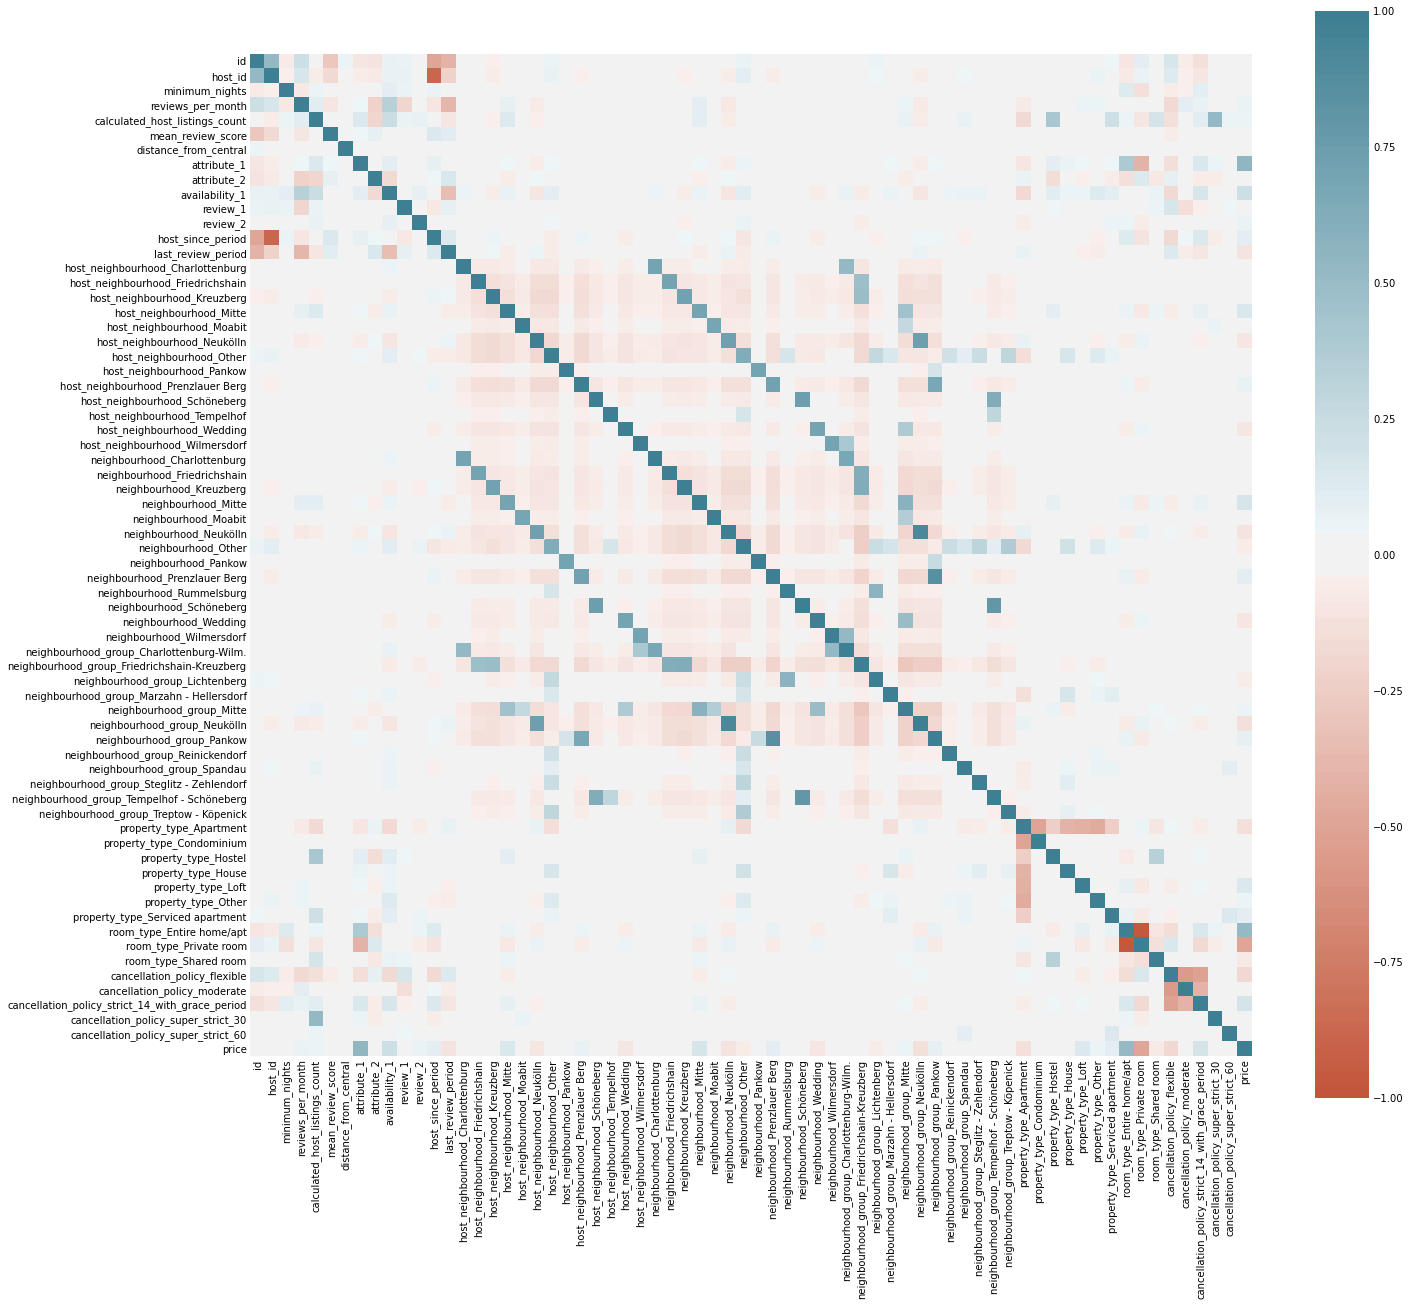

In [141]:
jointDF = pd.concat([alldata, price], axis = 1)

f = plt.subplots(figsize=(20, 20))

sb.heatmap(jointDF.corr(), 
    vmin=-1, vmax=1, center=0,
    cmap=sb.diverging_palette(20, 220, n=200), square = True)

In [142]:
print("Correlation Coefficients: ")
jointDF.corr()['price'].sort_values()

Correlation Coefficients: 


room_type_Private room                            -0.490262
cancellation_policy_flexible                      -0.182474
property_type_Apartment                           -0.135216
neighbourhood_group_Neukölln                      -0.123973
neighbourhood_Neukölln                            -0.115234
                                                     ...   
cancellation_policy_strict_14_with_grace_period    0.186149
availability_1                                     0.220462
room_type_Entire home/apt                          0.508299
attribute_1                                        0.544975
price                                              1.000000
Name: price, Length: 68, dtype: float64

From the correlation coefficient matrix above __(the last row)__, we can have a rough idea which predictors have a larger effect on price(response). 

In [143]:
alldata_z.to_csv('allpredictors_FINAL.csv', index = False)

In [144]:
price.to_csv('response.csv', index = False)

# Random Forest


In [146]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [30,40,50],
    'max_features': [20,30,40],
    'min_samples_leaf': [1,2,3],
    'min_samples_split': [2,3,4],
    'n_estimators': [100,200,300,400]}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [149]:
y = location['price']#still need to change 
X = listsum

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

NameError: name 'listsum' is not defined

In [150]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)
grid_search.best_params_

NameError: name 'X_train' is not defined

In [ ]:
# Get train score
best_grid = grid_search.best_estimator_
best_grid.fit(X_train,y_train)
best_grid.score(X_train,y_train)

In [ ]:
# Get test score
best_grid.fit(X_test,y_test)
best_grid.score(X_test,y_test)

In [ ]:
# Create the column of predicted prices
best_grid.fit(X,y)
listingSum['predicted']=best_grid.predict(X)

In [ ]:
#predictdata['difference']=predictdata['price']-predictdata['predicted']

In [ ]:
#predictdata['percentage difference']=(predictdata['difference']/predictdata['price'])*100

In [148]:
# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(X, round(importance, 2)) for X, importance in zip(list(X.columns), importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

NotFittedError: This RandomForestRegressor instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
# Sort and create the bar chart
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(list(sorted_features[0:13]), sorted_importances[0:13], orientation = 'vertical', color = 'b', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(list(sorted_features[0:13]), sorted_features[0:13], rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

# Random forest plots


In [ ]:
plot = pd.read_csv('mapshit.csv')
plot.head()

In [ ]:
trace0=go.Scattermapbox(
            lat=plot.latitude,
            lon=plot.longitude,
          
            mode='markers',
            marker=dict(
                opacity=0.5, 
                size=10, 
                color=plot.percentage,
               
                colorscale="RdPu",
                cauto=False,
                cmin= -30,
                cmax= 30,
                showscale=True),
                text=plot.percentage,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Percentage Difference",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=go.Figure(
    data=data,
    layout=layout,
    )


iplot(figure)

In [ ]:
#Post Random Forest plots
#For our slides
map = pd.read_csv('mapshit.csv')
map.head()

In [ ]:
location = pd.read_csv('location.csv')
location.head()

In [ ]:
map = map.drop(columns = ['predicted', 'latitude', 'longitude', 'difference', 'price'])

In [ ]:
map.head()

In [ ]:
mapMerged = pd.concat([map, location], axis = 1)

In [ ]:
mapMerged.head()

In [ ]:
mapMerged.info()

In [ ]:
mapMerged = mapMerged[mapMerged['price'].notna()]

In [ ]:
mapMerged = mapMerged[mapMerged['percentage'].notna()]

In [ ]:
mapMerged.info()

In [ ]:
#Rounding coordinates by chosen precision creates a grid
rounding_num=0.015 
mapMerged["lon_mod"]=np.round(mapMerged.longitude/rounding_num,0)*rounding_num

#Adjusting for difference in actual distance between same numeric change in lat and lon to create a square grid
correction_coeff=0.5
mapMerged["lat_mod"]=np.round(mapMerged.latitude/(rounding_num*correction_coeff),0)*(rounding_num*correction_coeff)

In [ ]:
mapMerged["lon_mod"]=np.round(mapMerged["lon_mod"],4)
mapMerged["lat_mod"]=np.round(mapMerged["lat_mod"],4)

In [ ]:
mapMerged.head()

In [ ]:
mapMerged.to_csv('mapMerged.csv', index = False)

In [ ]:
# Creating grid dataframe with average unit prices for each tile. Excluding tiles with sample below 3 as insufficient samples. 
df_mapRF=mapMerged[["lat_mod","lon_mod","percentage"]].groupby(["lat_mod","lon_mod"], as_index=False).mean()
df_mapRF["sample_size"]=mapMerged[["lat_mod","lon_mod","id"]].groupby(["lat_mod","lon_mod"], as_index=False).count().id
df_mapRF["neighbourhood_group_cleansed"]=mapMerged[["lat_mod","lon_mod","neighbourhood_group_cleansed"]].groupby(["lat_mod","lon_mod"], as_index=False).first().neighbourhood_group_cleansed
df_mapRF["neighbourhood_group_cleansed"]=np.where(df_mapRF.neighbourhood_group_cleansed.isna(),"Other",df_mapRF.neighbourhood_group_cleansed)
df_mapRF=df_mapRF.query("sample_size>3")
df_mapRF.reset_index(inplace=True)
df_mapRF["geo_Id"]=df_mapRF.index

In [ ]:
df_mapRF.shape

In [ ]:
df_mapRF.head()

In [ ]:
data=[]
trace0=dict(
            lat=df_mapRF.lat_mod,
            lon=df_mapRF.lon_mod,
          
            type="scattermapbox",
            mode='markers',
            marker=dict(

                size=18, 
                color=df_mapRF.percentage,
                opacity=0.6,
                colorscale="RdBu",
                cauto=False,
                cmin = -30,
                cmid = 0,
                cmax = 10,
                showscale=True),
                text=df_mapRF.percentage,
            
           
            )



data=[trace0]

layout = go.Layout(
    title="Price by gridplot",  
    title_x=0.4,
   
    
    
    height = 800,
    # top, bottom, left and right margins
    margin = dict(t = 80, b = 0, l = 0, r = 0),
    font = dict(color = 'dark grey', size = 18),
 
    mapbox = dict(
       

        center = dict(
            lat = center_coors[0],
            lon = center_coors[1]
        ),
        # default level of zoom
        zoom = 10,
        # default map style
        style = "carto-positron"
    )

)

figure=dict(
    data=data,
    layout=layout
    )


iplot(figure)